<a href="https://colab.research.google.com/github/nadsu077/Top.in.CompXIII/blob/main/L1_T%C3%B3picos_especiais_em_comp_XIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE***
***TÓPICOS ESPECIAIS EM COMPUTAÇÃO XIII - Lista 1 (T1)***

***Docente:*** Antônio Carlos Gay Thomé

***Discentes:*** Nadson Ângelo e Rosângela D'Ávilla


# Instalação e importação dos pacotes.

In [ ]:
pkg <- c("dplyr", "caret","readxl","GGally","corrplot","ggplot2", "magrittr","ggfortify", "car")
install.packages(pkg[!pkg%in%rownames(installed.packages())], quiet = T)
sapply(pkg, require, character.only = T)

options(digits = 11, scipen = 999)

also installing the dependencies ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘matrixStats’, ‘RcppArmadillo’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’, ‘reshape’, ‘gridExtra’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: readxl

Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading requ

dplyr     caret    readxl    GGally  corrplot   ggplot2  magrittr ggfortify 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 
      car 
     TRUE

#Lendo os dados a serem usados no exercício e visualizando algumas informações

In [ ]:
file <- "https://github.com/nadsu077/Top.in.CompXIII/raw/main/Lista1_Conjunto1.xlsx"
tmp <- tempfile(pattern = ".xlsx")
download.file(file, quiet = T, destfile = tmp)
c1 <- read_xlsx(tmp, sheet = 1) %>% as.data.frame()
str(c1) # Informações das variáveis
summary(c1) # dados apresentam NA
head(c1)  # primeira linha e coluna 7 sao de NAs, entao vamos remover
c1 <- c1[-1,-7] # Retirando linha 1 e coluna 7
summary(c1) # Agora os dados nao tem NA
class(c1[,7]) # A variavel Classe e numerica, precisamos visualizar ela como fator
t(summary(factor(c1[,7]))) # Existem 50 elementos para cada tipo de Classe (1, 2 e 3)


New names:
* `` -> ...7



'data.frame':	151 obs. of  8 variables:
 $ V1     : num  NA 6.3 5.8 5.1 4.9 4.7 4.6 5 6.4 6.9 ...
 $ V2     : num  NA 3.3 2.7 3.5 3 3.2 3.1 3.6 3.2 3.1 ...
 $ V3     : num  NA 7.65 7.55 4.95 5.3 4.6 4.55 4.6 8 9.15 ...
 $ V4     : num  NA 6 5.1 1.4 1.4 1.3 1.5 1.4 4.5 4.9 ...
 $ V5     : num  NA 36 26.01 1.96 1.96 ...
 $ V6     : num  NA 2.5 1.9 0.2 0.2 0.2 0.2 0.2 1.5 1.5 ...
 $ ...7   : logi  NA NA NA NA NA NA ...
 $ Classes: num  NA 3 3 1 1 1 1 1 2 2 ...


       V1                  V2                  V3                   V4       
 Min.   :4.3000000   Min.   :2.0000000   Min.   : 3.8000000   Min.   :1.000  
 1st Qu.:5.1000000   1st Qu.:2.8000000   1st Qu.: 5.1625000   1st Qu.:1.600  
 Median :5.8000000   Median :3.0000000   Median : 7.4000000   Median :4.350  
 Mean   :5.8433333   Mean   :3.0573333   Mean   : 7.1006667   Mean   :3.758  
 3rd Qu.:6.4000000   3rd Qu.:3.3000000   3rd Qu.: 8.5875000   3rd Qu.:5.100  
 Max.   :7.9000000   Max.   :4.4000000   Max.   :11.5000000   Max.   :6.900  
 NA's   :1           NA's   :1           NA's   :1            NA's   :1      
       V5                  V6              ...7            Classes 
 Min.   : 1.000000   Min.   :0.1000000   Mode:logical   Min.   :1  
 1st Qu.: 2.560000   1st Qu.:0.3000000   NA's:151       1st Qu.:1  
 Median :18.925000   Median :1.3000000                  Median :2  
 Mean   :17.218067   Mean   :1.1993333                  Mean   :2  
 3rd Qu.:26.010000   3rd Qu.:1.80000

,V1,V2,V3,V4,V5,V6,...7,Classes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,NA,NA,NA,NA,NA,NA,NA,NA
2,6.3,3.3,7.65,6.0,36.00,2.5,NA,3
3,5.8,2.7,7.55,5.1,26.01,1.9,NA,3
4,5.1,3.5,4.95,1.4,1.96,0.2,NA,1
5,4.9,3.0,5.30,1.4,1.96,0.2,NA,1
6,4.7,3.2,4.60,1.3,1.69,0.2,NA,1


       V1                  V2                  V3                   V4       
 Min.   :4.3000000   Min.   :2.0000000   Min.   : 3.8000000   Min.   :1.000  
 1st Qu.:5.1000000   1st Qu.:2.8000000   1st Qu.: 5.1625000   1st Qu.:1.600  
 Median :5.8000000   Median :3.0000000   Median : 7.4000000   Median :4.350  
 Mean   :5.8433333   Mean   :3.0573333   Mean   : 7.1006667   Mean   :3.758  
 3rd Qu.:6.4000000   3rd Qu.:3.3000000   3rd Qu.: 8.5875000   3rd Qu.:5.100  
 Max.   :7.9000000   Max.   :4.4000000   Max.   :11.5000000   Max.   :6.900  
       V5                  V6               Classes 
 Min.   : 1.000000   Min.   :0.1000000   Min.   :1  
 1st Qu.: 2.560000   1st Qu.:0.3000000   1st Qu.:1  
 Median :18.925000   Median :1.3000000   Median :2  
 Mean   :17.218067   Mean   :1.1993333   Mean   :2  
 3rd Qu.:26.010000   3rd Qu.:1.8000000   3rd Qu.:3  
 Max.   :47.610000   Max.   :2.5000000   Max.   :3  

[1] "numeric"

1,2,3
50,50,50


#**1.a & b) Análise inicial dos dados:**

Visualizando a dispersão entre cada variável, sua respectiva distribuição e correlação entre si usando a função ggpairs()

[1] "Matriz de Covariância"


,V1,V2,V3,V4,V5,V6,Classes
V1,0.685693512304,-0.042434004474,1.43503803132,1.27431543624,9.3844467562,0.51627069351,0.53087248322
V2,-0.042434004474,0.189979418345,-0.36983713647,-0.32965637584,-1.8794320358,-0.12163937360,-0.15234899329
V3,1.435038031320,-0.369837136465,3.42483176734,3.04311543624,21.5880415660,1.21500044743,1.29026845638
V4,1.274315436242,-0.329656375839,3.04311543624,3.11627785235,21.9299249664,1.29560939597,1.37248322148
V5,9.384446756152,-1.879432035794,21.58804156600,21.92992496644,159.4422291230,9.10434098434,9.71684563758
V6,0.516270693512,-0.121639373602,1.21500044743,1.29560939597,9.1043409843,0.58100626398,0.59731543624
Classes,0.530872483221,-0.152348993289,1.29026845638,1.37248322148,9.7168456376,0.59731543624,0.67114093960


[1] "Matriz de Correlação"


,V1,V2,V3,V4,V5,V6,Classes
V1,1.00000000000,-0.11756978413,0.93643744010,0.87175377589,0.89751553749,0.81794112627,0.78256123181
V2,-0.11756978413,1.00000000000,-0.45849818351,-0.42844010433,-0.34148502991,-0.36612593254,-0.42665756078
V3,0.93643744010,-0.45849818351,1.00000000000,0.93149540922,0.92382975334,0.86132372302,0.85104709316
V4,0.87175377589,-0.42844010433,0.93149540922,1.00000000000,0.98382392667,0.96286543140,0.94903469901
V5,0.89751553749,-0.34148502991,0.92382975334,0.98382392667,1.00000000000,0.94592440152,0.93932689865
V6,0.81794112627,-0.36612593254,0.86132372302,0.96286543140,0.94592440152,1.00000000000,0.95654733288
Classes,0.78256123181,-0.42665756078,0.85104709316,0.94903469901,0.93932689865,0.95654733288,1.00000000000


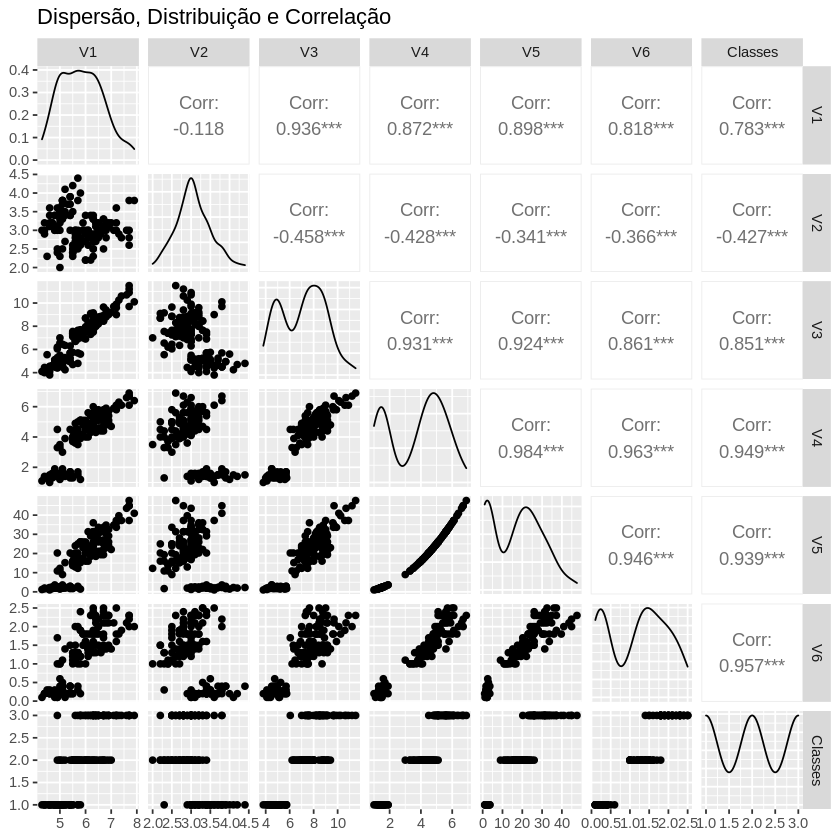

[1] "Rank da Matriz: 5"


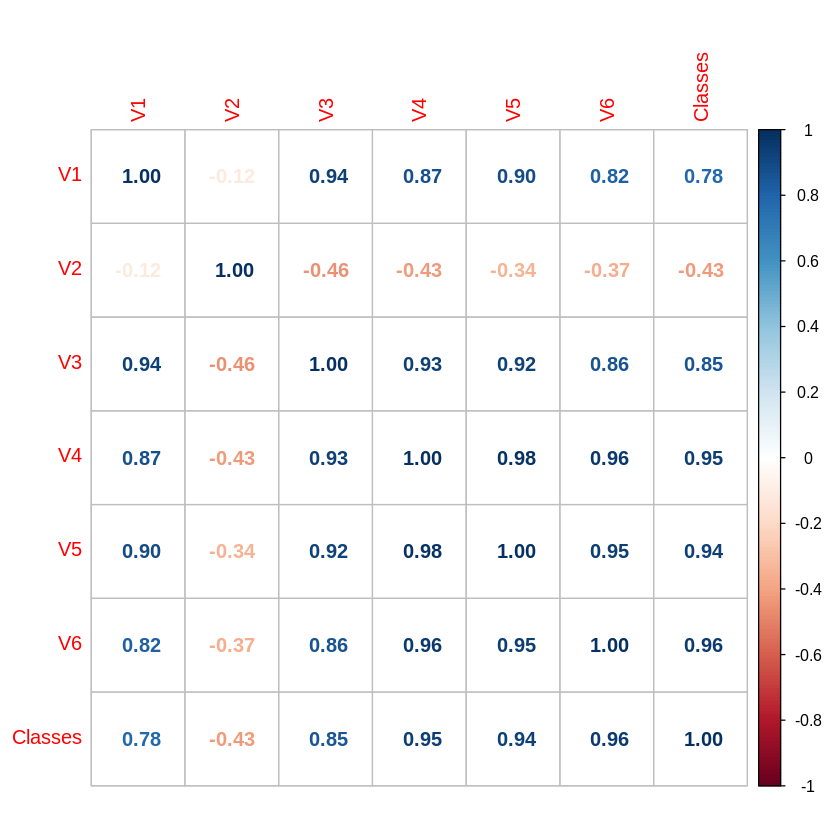

In [ ]:
print("Matriz de Covariância")
c1 %>% cov() # Covariância
print("Matriz de Correlação")
c1 %>% cor() # Correlação
ggpairs(c1, title = "Dispersão, Distribuição e Correlação")
corrplot(cor(c1), method = "number")

print(paste0("Rank da Matriz: ", qr(c1[,1:6])$rank))

#Analisando a correlação
Analisando a matriz de correlação e o gráfico gerado pela função ggpairs() é possível observar que os dados apresentam correlação bastante elevada, exceto a variável V2 que mantém correlação médio-baixo com as demais variáveis.

Pelos gráficos de dispersão do ggpairs é possível notar relações lineares entre algumas variáveis. Deixando a observação da variável V4 com a V5 que aparentam ter uma relação exponencial, tendo correlação de 0.984. As demais variáveis apresentam ter relação linear positiva, exceto a variável V2 com todas as outras variáveis, onde a relação entre V2 e as demais apresentam uma núvem neutra sem relação linear ou, no máximo tendo uma relação linear negativa e bem suave.








#**1.c) Normalidade**

Realizando a análise de normalidade dos dados, utilizando teste de normalidade de Shapiro-Wilks, assimetria e curtose

,Mean
,<dbl>
V1:,5.8433333333
V2:,3.0573333333
V3:,7.1006666667
V4:,3.7580000000
V5:,17.2180666667
V6:,1.1993333333
V7:,2.0000000000
,Variance
,<dbl>


,statistic,p.value,method
,<list>,<list>,<list>
V1:,0.97609027224,0.010181161176,Shapiro-Wilk normality test
V2:,0.98491786948,0.10115426844,Shapiro-Wilk normality test
V3:,0.95425039558,0.000075114468368,Shapiro-Wilk normality test
V4:,0.87626805531,0.00000000074122630064,Shapiro-Wilk normality test
V5:,0.91037748879,0.000000053296002311,Shapiro-Wilk normality test
V6:,0.901834938,0.000000016804651671,Shapiro-Wilk normality test
V7:,0.79289749661,0.00000000000027163182241,Shapiro-Wilk normality test


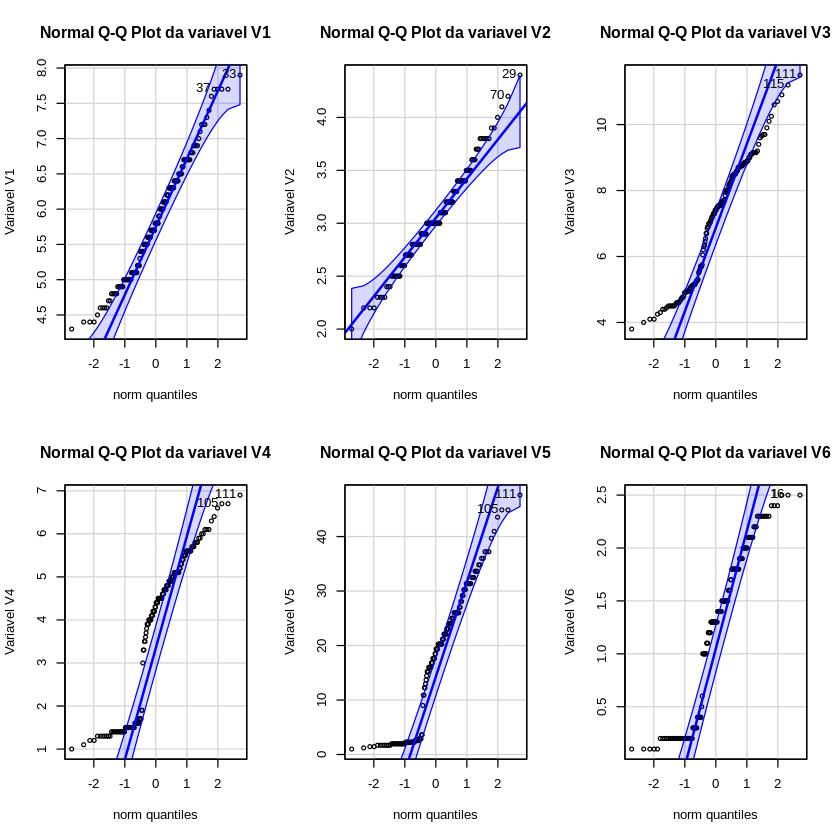

In [ ]:
# 1.c) Grau de Normalidade ----
# Teste de Shapiro-Wilk
estatisticas <- function(x){
    # Função para mostrar algumas estatísticas das variáveis do nosso df
 curt = ass = mad = mean = sd = var = as.data.frame(matrix(NA, nrow = ncol(c1), ncol = 1))

 i = 1
 while(i<=ncol(c1)){
   mean[i,1] <- mean(c1[,i]) # Media
   var[i,1] <- var(c1[,i]) # Variância
   mad[i,1] <- mad(c1[,i]) # Desvio médio absoluto
   sd[i,1] <- sd(c1[,i]) # Desvio-padrão
   ass[i,1] <- (mean(c1[,i])-median(c1[,i]))/sd(c1[,i]) # Assimetria (3º momento centrado na média)
   curt[i,1] <- (sum((c1[,i]-mean(c1[,i]))^4)/(length(c1[,i])-1))/var(c1[,i])^2 # Curtose (4º momento centrado na média)
   
   i = i+1
 }
 colnames(mean) = "Mean"; rownames(mean) = paste0("V",1:7,":")
 colnames(var) = "Variance"; rownames(var) = paste0("V",1:7,":")
 colnames(sd) = "Standard Deviation"; rownames(sd) = paste0("V",1:7,":")
 colnames(mad) = "Absolute Deviation"; rownames(mad) = paste0("V",1:7,":")
 colnames(curt) = "Kurtosis"; rownames(curt) = paste0("V",1:7,":")
 colnames(ass) = "Asymmetry Coefficient"; rownames(ass) = paste0("V",1:7,":")
 
 return(list(mean,var, sd, mad, curt,ass))
}
S.W.test <- function(c1){
    # Função para retornar os testes de Shapiro-Wilk de todas as variáveis
  test <- list()
  for(i in 1:ncol(c1)){
    test[[i]] <- shapiro.test(c1[,i])
  }
  test <- do.call(rbind, test); test <- test[,-4]
  for(i in 1:ncol(test)){
    test[,i] <- test[,i] %>% do.call(rbind,.)
  }
  test <- test %>% as.data.frame(); rownames(test) <- paste0("V",1:ncol(c1),":")
  return(test)
}

estatisticas(c1)
S.W.test(c1)

graficos.qqplot <- function(c1){
    # Função para plotar os qq-plot de cada variável
  par(mfrow = c(2,(ncol(c1)-1)/2))
  i<-1
  while (i <=ncol(c1)-1) {
    qqPlot(c1[,i], col = "black", ylab = paste0("Variavel V",i),
           main = paste0("Normal Q-Q Plot da variavel V",i))
    i <- i+1
  }
  par(mfrow=c(1,1))
}

graficos.qqplot(c1)

#Teste de Hipótese de Shapiro-Wilk para normalidade dos dados
*   H0 (Hipótese Nula): Os dados seguem uma distribuicao normal
*   H1 (Hipótese Alternativa): Os dados nao seguem uma distribuicao normal

Como o p-value de cada variavel foi abaixo de 0.05, exceto V2 que teve p-value = 0.10115, então ao nivel de 95% de confianca, rejeita-se H0 e nao rejeita-se H1. Ou seja, rejeito a hipotese de que os dados seguem uma distribuicao normal (exceto para V2).

#Análise do QQ-Plot
Analisando o qq-plot de cada variável, é possível identificar que de fato somente a variável 2 está nos limites aceitáveis para identificação de normalidade na distribuição dos dados, diferente das demais variáveis, onde a representação gráfica ficaram semelhantes ao de uma sigmóide ou uma função logística.

#Assimetria
As variáveis apresentaram assimetria. Atenção para V4 em que teve o maior grau de assimetria, sendo essa negativa (-0.03353). Foi observado que V2 tem tendência a normalidade, porém obteve assimetria de 0.1315. V1, que não passou no teste de normalidade, obteve assimetria de 0.0523, sendo a variável mais próxima de 0, ou seja, a mais próxima de ser simétrica.

#Curtose
As variáveis, exceto V2, apresentaram índice de momento curtose inferior a 3, ou seja, a diferença entre o ponto 0 e o topo da curta é relativamente pequena, se comparado com uma normal-padrão - Normal(0,1). A V2 obteve índice de aproximadamente 3.16, indicando um topo consideralvelmente mais acentuado do que o de uma normal-padrão.

#**1.d) Analisando a distribuição dos dados (Box-plot e Histograma)**

Para ter uma melhor análise e interpretação de como são os dados precisamos ver o histograma, que irá nos mostrar como os dados das variáveis estão distribuídos, e o box-plot, que nos traz os intervalos interquantílicos, bem como o limite mínimo e máximo com a presença de *outliers*.

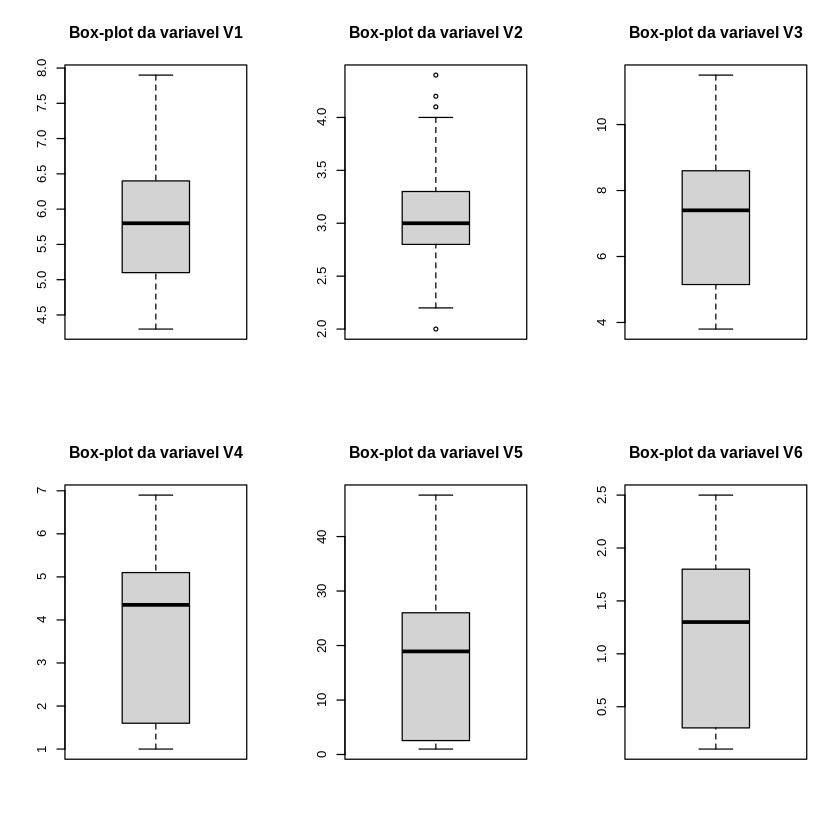

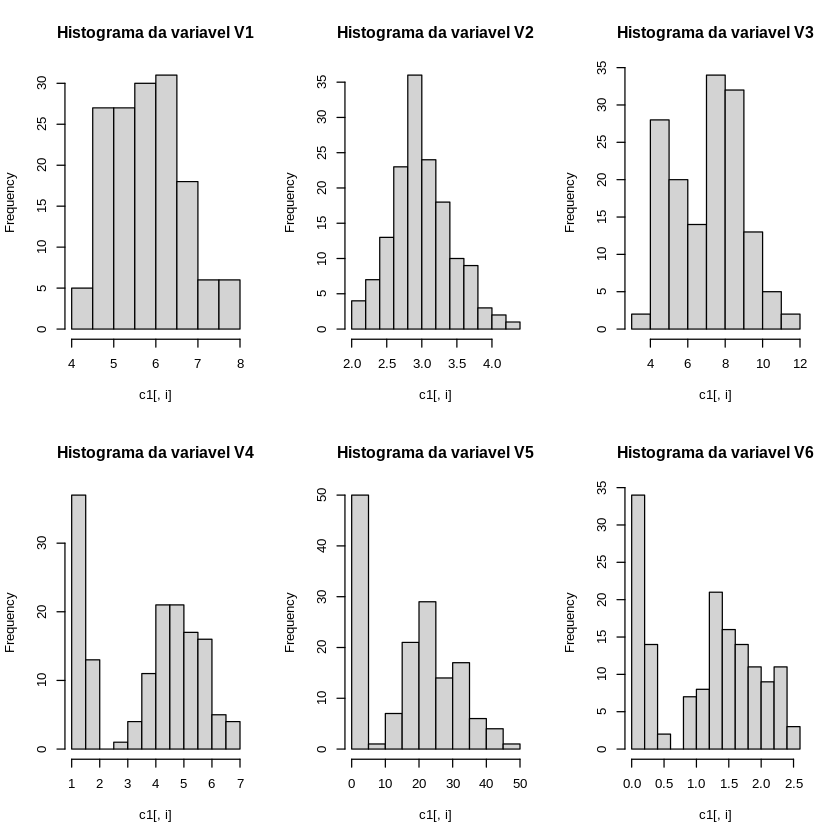

In [ ]:
graficos.boxplot <- function(c1){
    # Função para plotar todos os box-plot das variáveis
  par(mfrow = c(2,(ncol(c1)-1)/2))
  i<-1
  while (i <=ncol(c1)-1) {
    boxplot(c1[,i], 
            main=paste0("Box-plot da variavel V",i))
    i <- i+1
  }
  par(mfrow=c(1,1))
}
graficos.boxplot(c1)

# Analise
# Mesmo apresentando outliers, a variavel V2 apresentou
# tendencia a normalidade, pelo teste Shapiro-Wilk.
# Os boxplots das demais variavels apresentam bastante
# assimetria, teremos que olhar o histograma.

graficos.hist <- function(c1){
    # Função para plotar todos os histogramas das variáveis
  par(mfrow = c(2,(ncol(c1)-1)/2))
  
  i=1
  while (i <=ncol(c1)-1) {
    hist(c1[,i], 
            main=paste0("Histograma da variavel V",i))
    i <- i+1
  }
  par(mfrow=c(1,1))
}
graficos.hist(c1)

#Análise

Como foi observado no item 1.c) as variáveis apresentam assimetria, foi constatado que V2 apresenta assimetria positiva, como pode-se observar no histograma e no box-plot, onde a mediana divide o Q1 e o Q2 de forma homogênea. Mesmo com a presença de *outliers* em V2, estes não tem influência tão forte nos dados. V1 foi a que apresentou assimetria mais próxima de 0 e como se pode observar no histograma ela tem tendência a simetria dos dados (Média = Mediana = Moda). As demais variáveis apresentam bastante assimetria nos dados, conforme pode-se observar no histograma, bem como nos diagramas de caixa.

#**2.a) Normalização dos dados**

Os dados, pelo teste de Shapiro-Wilk, não seguem uma normal padrão, porém nosso intuito não é transformar a distribuição/forma dos dados. Dessa forma, se dará continuidade na normalização dos dados, onde iremos deixar os dados normalizados (centrado em média igual a zero e sem efeitos de escala).

,V1,V2,V3,V4,V5,V6,Classes
V1,1.00000000000,-0.11756978413,0.93643744010,0.87175377589,0.89751553749,0.81794112627,0.78256123181
V2,-0.11756978413,1.00000000000,-0.45849818351,-0.42844010433,-0.34148502991,-0.36612593254,-0.42665756078
V3,0.93643744010,-0.45849818351,1.00000000000,0.93149540922,0.92382975334,0.86132372302,0.85104709316
V4,0.87175377589,-0.42844010433,0.93149540922,1.00000000000,0.98382392667,0.96286543140,0.94903469901
V5,0.89751553749,-0.34148502991,0.92382975334,0.98382392667,1.00000000000,0.94592440152,0.93932689865
V6,0.81794112627,-0.36612593254,0.86132372302,0.96286543140,0.94592440152,1.00000000000,0.95654733288
Classes,0.78256123181,-0.42665756078,0.85104709316,0.94903469901,0.93932689865,0.95654733288,1.00000000000


[1] "[Normalizando] Centralizando e escalando usando funcao scale (R base)"


,V1,V2,V3,V4,V5,V6
2,0.551485746412,0.556745669608,0.29683583624,1.27004035792,1.487437121820,1.70637941371
3,-0.052330764258,-0.819823293709,0.24280018644,0.76021148989,0.696278055111,0.91922335408
4,-0.897673879197,1.015601990714,-1.16212670839,-1.33575163424,-1.208364142520,-1.31105214821
5,-1.139200483465,-0.131538812050,-0.97300193409,-1.33575163424,-1.208364142520,-1.31105214821
6,-1.380727087733,0.327317509055,-1.35125148270,-1.39239928624,-1.229746819999,-1.31105214821
7,-1.501490389867,0.097889348503,-1.37826930760,-1.27910398224,-1.185397563006,-1.31105214821
8,-1.018437181331,1.245030151266,-1.35125148270,-1.33575163424,-1.208364142520,-1.31105214821
9,0.672249048546,0.327317509055,0.48596061055,0.42032557787,0.240114268901,0.39445264766
10,1.276065559217,0.097889348503,1.10737058326,0.64691618588,0.537887851566,0.39445264766
11,-0.414620670660,-1.737535935920,0.24280018644,0.13708731785,-0.096464913633,0.13206729445


,V1,V2,V3,V4,V5,V6
2,0.551485746412,0.55674566961,0.29683583624,1.27004035792,1.48743712182,1.70637941371
3,-0.052330764258,-0.81982329371,0.24280018644,0.76021148989,0.69627805511,0.91922335408
4,-0.897673879197,1.01560199071,-1.16212670839,-1.33575163424,-1.20836414252,-1.31105214821
5,-1.139200483465,-0.13153881205,-0.97300193409,-1.33575163424,-1.20836414252,-1.31105214821
6,-1.380727087733,0.32731750906,-1.35125148270,-1.39239928624,-1.22974682000,-1.31105214821


       V1                     V2                    V3             
 Min.   :-1.863780296   Min.   :-2.42582042   Min.   :-1.78353668  
 1st Qu.:-0.897673879   1st Qu.:-0.59039513   1st Qu.:-1.04730095  
 Median :-0.052330764   Median :-0.13153881   Median : 0.16174671  
 Mean   : 0.000000000   Mean   : 0.00000000   Mean   : 0.00000000  
 3rd Qu.: 0.672249049   3rd Qu.: 0.55674567   3rd Qu.: 0.80342005  
 Max.   : 2.483698581   Max.   : 3.08045544   Max.   : 2.37720835  
       V4                    V5                    V6             
 Min.   :-1.56234224   Min.   :-1.28439144   Min.   :-1.44224482  
 1st Qu.:-1.22245633   1st Qu.:-1.16084708   1st Qu.:-1.17985947  
 Median : 0.33535410   Median : 0.13518076   Median : 0.13206729  
 Mean   : 0.00000000   Mean   : 0.00000000   Mean   : 0.00000000  
 3rd Qu.: 0.76021149   3rd Qu.: 0.69627806   3rd Qu.: 0.78803068  
 Max.   : 1.77986923   Max.   : 2.40689225   Max.   : 1.70637941  

,Mean
,<dbl>
V1:,5.8433333333
V2:,3.0573333333
V3:,7.1006666667
V4:,3.7580000000
V5:,17.2180666667
V6:,1.1993333333
V7:,2.0000000000
,Variance
,<dbl>


,V1,V2,V3,V4,V5,V6
V1,1.00000000000,-0.11756978413,0.93643744010,0.87175377589,0.89751553749,0.81794112627
V2,-0.11756978413,1.00000000000,-0.45849818351,-0.42844010433,-0.34148502991,-0.36612593254
V3,0.93643744010,-0.45849818351,1.00000000000,0.93149540922,0.92382975334,0.86132372302
V4,0.87175377589,-0.42844010433,0.93149540922,1.00000000000,0.98382392667,0.96286543140
V5,0.89751553749,-0.34148502991,0.92382975334,0.98382392667,1.00000000000,0.94592440152
V6,0.81794112627,-0.36612593254,0.86132372302,0.96286543140,0.94592440152,1.00000000000


,V1,V2,V3,V4,V5,V6
V1,1.00000000000,-0.11756978413,0.93643744010,0.87175377589,0.89751553749,0.81794112627
V2,-0.11756978413,1.00000000000,-0.45849818351,-0.42844010433,-0.34148502991,-0.36612593254
V3,0.93643744010,-0.45849818351,1.00000000000,0.93149540922,0.92382975334,0.86132372302
V4,0.87175377589,-0.42844010433,0.93149540922,1.00000000000,0.98382392667,0.96286543140
V5,0.89751553749,-0.34148502991,0.92382975334,0.98382392667,1.00000000000,0.94592440152
V6,0.81794112627,-0.36612593254,0.86132372302,0.96286543140,0.94592440152,1.00000000000


[1] "[Normalizando] Usando o pacote caret"


,V1,V2,V3,V4,V5,V6
2,0.551485746412,0.556745669608,0.29683583624,1.27004035792,1.487437121820,1.70637941371
3,-0.052330764258,-0.819823293709,0.24280018644,0.76021148989,0.696278055111,0.91922335408
4,-0.897673879197,1.015601990714,-1.16212670839,-1.33575163424,-1.208364142520,-1.31105214821
5,-1.139200483465,-0.131538812050,-0.97300193409,-1.33575163424,-1.208364142520,-1.31105214821
6,-1.380727087733,0.327317509055,-1.35125148270,-1.39239928624,-1.229746819999,-1.31105214821
7,-1.501490389867,0.097889348503,-1.37826930760,-1.27910398224,-1.185397563006,-1.31105214821
8,-1.018437181331,1.245030151266,-1.35125148270,-1.33575163424,-1.208364142520,-1.31105214821
9,0.672249048546,0.327317509055,0.48596061055,0.42032557787,0.240114268901,0.39445264766
10,1.276065559217,0.097889348503,1.10737058326,0.64691618588,0.537887851566,0.39445264766
11,-0.414620670660,-1.737535935920,0.24280018644,0.13708731785,-0.096464913633,0.13206729445


,V1,V2,V3,V4,V5,V6
2,0.551485746412,0.55674566961,0.29683583624,1.27004035792,1.48743712182,1.70637941371
3,-0.052330764258,-0.81982329371,0.24280018644,0.76021148989,0.69627805511,0.91922335408
4,-0.897673879197,1.01560199071,-1.16212670839,-1.33575163424,-1.20836414252,-1.31105214821
5,-1.139200483465,-0.13153881205,-0.97300193409,-1.33575163424,-1.20836414252,-1.31105214821
6,-1.380727087733,0.32731750906,-1.35125148270,-1.39239928624,-1.22974682000,-1.31105214821


       V1                     V2                    V3             
 Min.   :-1.863780296   Min.   :-2.42582042   Min.   :-1.78353668  
 1st Qu.:-0.897673879   1st Qu.:-0.59039513   1st Qu.:-1.04730095  
 Median :-0.052330764   Median :-0.13153881   Median : 0.16174671  
 Mean   : 0.000000000   Mean   : 0.00000000   Mean   : 0.00000000  
 3rd Qu.: 0.672249049   3rd Qu.: 0.55674567   3rd Qu.: 0.80342005  
 Max.   : 2.483698581   Max.   : 3.08045544   Max.   : 2.37720835  
       V4                    V5                    V6             
 Min.   :-1.56234224   Min.   :-1.28439144   Min.   :-1.44224482  
 1st Qu.:-1.22245633   1st Qu.:-1.16084708   1st Qu.:-1.17985947  
 Median : 0.33535410   Median : 0.13518076   Median : 0.13206729  
 Mean   : 0.00000000   Mean   : 0.00000000   Mean   : 0.00000000  
 3rd Qu.: 0.76021149   3rd Qu.: 0.69627806   3rd Qu.: 0.78803068  
 Max.   : 1.77986923   Max.   : 2.40689225   Max.   : 1.70637941  

,Mean
,<dbl>
V1:,5.8433333333
V2:,3.0573333333
V3:,7.1006666667
V4:,3.7580000000
V5:,17.2180666667
V6:,1.1993333333
V7:,2.0000000000
,Variance
,<dbl>


,V1,V2,V3,V4,V5,V6
V1,1.00000000000,-0.11756978413,0.93643744010,0.87175377589,0.89751553749,0.81794112627
V2,-0.11756978413,1.00000000000,-0.45849818351,-0.42844010433,-0.34148502991,-0.36612593254
V3,0.93643744010,-0.45849818351,1.00000000000,0.93149540922,0.92382975334,0.86132372302
V4,0.87175377589,-0.42844010433,0.93149540922,1.00000000000,0.98382392667,0.96286543140
V5,0.89751553749,-0.34148502991,0.92382975334,0.98382392667,1.00000000000,0.94592440152
V6,0.81794112627,-0.36612593254,0.86132372302,0.96286543140,0.94592440152,1.00000000000


,V1,V2,V3,V4,V5,V6
V1,1.00000000000,-0.11756978413,0.93643744010,0.87175377589,0.89751553749,0.81794112627
V2,-0.11756978413,1.00000000000,-0.45849818351,-0.42844010433,-0.34148502991,-0.36612593254
V3,0.93643744010,-0.45849818351,1.00000000000,0.93149540922,0.92382975334,0.86132372302
V4,0.87175377589,-0.42844010433,0.93149540922,1.00000000000,0.98382392667,0.96286543140
V5,0.89751553749,-0.34148502991,0.92382975334,0.98382392667,1.00000000000,0.94592440152
V6,0.81794112627,-0.36612593254,0.86132372302,0.96286543140,0.94592440152,1.00000000000


[1] "[Normalizando] Criando funcao de normalizacao"


0.551485746412,0.556745669608,0.29683583624,1.27004035792,1.487437121820,1.70637941371
-0.052330764258,-0.819823293709,0.24280018644,0.76021148989,0.696278055111,0.91922335408
-0.897673879197,1.015601990714,-1.16212670839,-1.33575163424,-1.208364142520,-1.31105214821
-1.139200483465,-0.131538812050,-0.97300193409,-1.33575163424,-1.208364142520,-1.31105214821
-1.380727087733,0.327317509055,-1.35125148270,-1.39239928624,-1.229746819999,-1.31105214821
-1.501490389867,0.097889348503,-1.37826930760,-1.27910398224,-1.185397563006,-1.31105214821
-1.018437181331,1.245030151266,-1.35125148270,-1.33575163424,-1.208364142520,-1.31105214821
0.672249048546,0.327317509055,0.48596061055,0.42032557787,0.240114268901,0.39445264766
1.276065559217,0.097889348503,1.10737058326,0.64691618588,0.537887851566,0.39445264766
-0.414620670660,-1.737535935920,0.24280018644,0.13708731785,-0.096464913633,0.13206729445
0.793012350681,-0.590395133156,0.91824580896,0.47697322987,0.312181811514,0.39445264766


0.551485746412,0.55674566961,0.29683583624,1.27004035792,1.48743712182,1.70637941371
-0.052330764258,-0.81982329371,0.24280018644,0.76021148989,0.69627805511,0.91922335408
-0.897673879197,1.01560199071,-1.16212670839,-1.33575163424,-1.20836414252,-1.31105214821
-1.139200483465,-0.13153881205,-0.97300193409,-1.33575163424,-1.20836414252,-1.31105214821
-1.380727087733,0.32731750906,-1.35125148270,-1.39239928624,-1.22974682000,-1.31105214821


       V1                     V2                    V3             
 Min.   :-1.863780296   Min.   :-2.42582042   Min.   :-1.78353668  
 1st Qu.:-0.897673879   1st Qu.:-0.59039513   1st Qu.:-1.04730095  
 Median :-0.052330764   Median :-0.13153881   Median : 0.16174671  
 Mean   : 0.000000000   Mean   : 0.00000000   Mean   : 0.00000000  
 3rd Qu.: 0.672249049   3rd Qu.: 0.55674567   3rd Qu.: 0.80342005  
 Max.   : 2.483698581   Max.   : 3.08045544   Max.   : 2.37720835  
       V4                    V5                    V6             
 Min.   :-1.56234224   Min.   :-1.28439144   Min.   :-1.44224482  
 1st Qu.:-1.22245633   1st Qu.:-1.16084708   1st Qu.:-1.17985947  
 Median : 0.33535410   Median : 0.13518076   Median : 0.13206729  
 Mean   : 0.00000000   Mean   : 0.00000000   Mean   : 0.00000000  
 3rd Qu.: 0.76021149   3rd Qu.: 0.69627806   3rd Qu.: 0.78803068  
 Max.   : 1.77986923   Max.   : 2.40689225   Max.   : 1.70637941  

,Mean
,<dbl>
V1:,5.8433333333
V2:,3.0573333333
V3:,7.1006666667
V4:,3.7580000000
V5:,17.2180666667
V6:,1.1993333333
V7:,2.0000000000
,Variance
,<dbl>


1.00000000000,-0.11756978413,0.93643744010,0.87175377589,0.89751553749,0.81794112627
-0.11756978413,1.00000000000,-0.45849818351,-0.42844010433,-0.34148502991,-0.36612593254
0.93643744010,-0.45849818351,1.00000000000,0.93149540922,0.92382975334,0.86132372302
0.87175377589,-0.42844010433,0.93149540922,1.00000000000,0.98382392667,0.96286543140
0.89751553749,-0.34148502991,0.92382975334,0.98382392667,1.00000000000,0.94592440152
0.81794112627,-0.36612593254,0.86132372302,0.96286543140,0.94592440152,1.00000000000


1.00000000000,-0.11756978413,0.93643744010,0.87175377589,0.89751553749,0.81794112627
-0.11756978413,1.00000000000,-0.45849818351,-0.42844010433,-0.34148502991,-0.36612593254
0.93643744010,-0.45849818351,1.00000000000,0.93149540922,0.92382975334,0.86132372302
0.87175377589,-0.42844010433,0.93149540922,1.00000000000,0.98382392667,0.96286543140
0.89751553749,-0.34148502991,0.92382975334,0.98382392667,1.00000000000,0.94592440152
0.81794112627,-0.36612593254,0.86132372302,0.96286543140,0.94592440152,1.00000000000


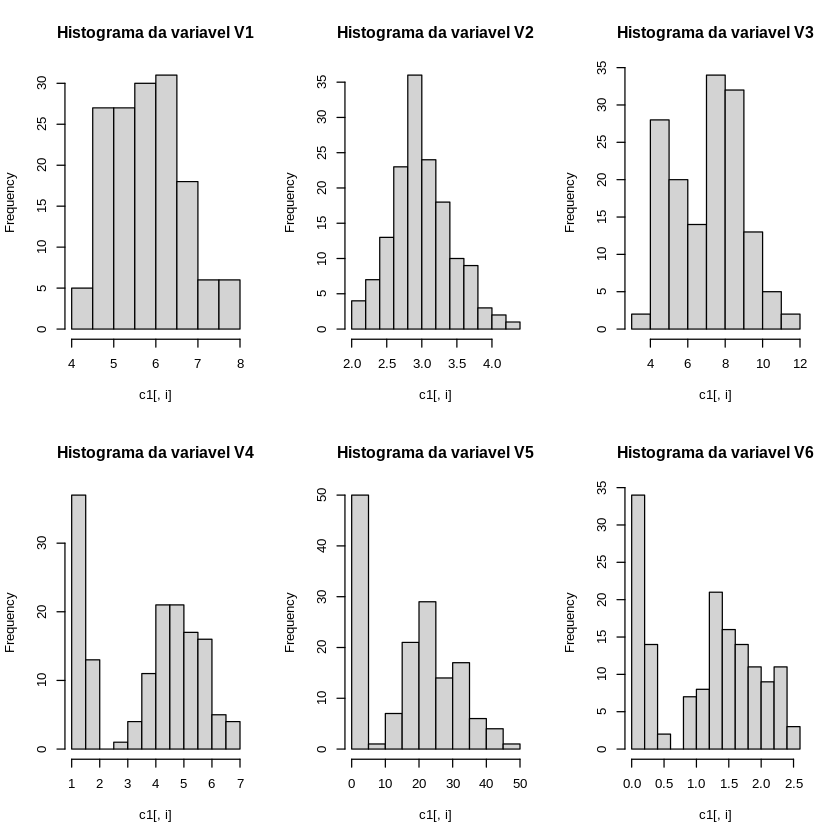

In [ ]:
graficos.hist <- function(c1){
  par(mfrow = c(2,(ncol(c1)-1)/2))
  
  i=1
  while (i <=ncol(c1)-1) {
    hist(c1[,i], 
         main=paste0("Histograma da variavel V",i))
    i <- i+1
  }
  par(mfrow=c(1,1))
}
graficos.hist(c1)

cor(c1)

print("[Normalizando] Centralizando e escalando usando funcao scale (R base)")
norm1b <- scale(c1[,1:6],center = T, scale =T) %>% as.matrix()
View(norm1b)
head(norm1b,5)
summary(norm1b)
estatisticas(norm1b)
cov(norm1b)
cor(norm1b)

print("[Normalizando] Usando o pacote caret")
norm1c <- preProcess(c1[,1:6], method = c("center","scale")) %>% predict(., c1[,1:6]) %>% as.matrix()
View(norm1c)
head(norm1c,5)
summary(norm1c)
estatisticas(norm1c)
cov(norm1c)
cor(norm1c)

print("[Normalizando] Criando funcao de normalizacao")
normalize = function(x){
  normal <- matrix(NA, nrow = nrow(x), ncol = ncol(x))
  for(i in 1:ncol(x)){
    normal[,i] <- (x[,i]-mean(x[,i]))/sd(x[,i])
  }
  return(normal)
}

norm1f <- normalize(c1[,1:6])
View(norm1f)
head(norm1f,5)
summary(norm1f)
estatisticas(norm1f)
cov(norm1f)
cor(norm1f)


#**2.b) Auto Valores e Auto Vetores - função eigen()**

In [ ]:
# Normalizacao do R-base
autb <- cov(norm1b) %>% eigen()
print("Auto Valores (R-base)")
autb$values
print("Auto Vetores (R-base)")
autb$vectors
print("Resumo - Auto Valores (R-base)")
summary(autb$values)
print("Resumo - Auto Vetores (R-base)")
summary(autb$vectors)

# Normalizacao do pacote Caret
autc <- cov(norm1c) %>% eigen()
print("Auto Valores (caret)")
autc$values
print("Auto Vetores (caret)")
autc$vectors
print("Resumo - Auto Valores (caret)")
summary(autc$values)
print("Resumo - Auto Vetores (caret)")
summary(autc$vectors)

# Normalizacao da funcao criada
autf <- cov(norm1f) %>% eigen()
print("Auto Valores (Normalização Criada)")
autf$values
print("Auto Vetores (Normalização Criada)")
autf$vectors
print("Resumo - Auto Valores (Normalização Criada)")
summary(autf$values)
print("Resumo - Auto Vetores (Normalização Criada)")
summary(autf$vectors)

[1] "Auto Valores (R-base)"


[1] 4.81071011078423538265269599 0.92404972231578130781315394
[3] 0.21565607770424921607599344 0.04040252319713551892865766
[5] 0.00918156599859606264990575 0.00000000000000016084389216

[1] "Auto Vetores (R-base)"


0.41643134729,-0.3416284009631,0.51249580847,0.176657022204,0.011496633313,0.64489002076326329415678629
-0.19852946652,-0.9342621045351,-0.13229843082,-0.020957717594,-0.070597748763,-0.25458638632150554226285522
0.44280260984,0.0243366919211,0.50537245543,0.165494734178,0.035229467509,-0.72062655586629276172061509
0.45080304193,0.0065688781545,-0.24579621155,-0.284203439701,-0.809658010813,0.00000000000000257432963835
0.44720045527,-0.0921351986207,-0.20562162554,-0.671386235920,0.546336093728,-0.00000000000000131838984174
0.43345726759,-0.0363323014173,-0.60145475499,0.639869901322,0.199031274247,0.00000000000000010408340856


[1] "Resumo - Auto Valores (R-base)"


       Min.     1st Qu.      Median        Mean     3rd Qu.        Max. 
0.000000000 0.016986805 0.128029300 1.000000000 0.746951311 4.810710111 

[1] "Resumo - Auto Vetores (R-base)"


       V1                    V2                      V3              
 Min.   :-0.19852947   Min.   :-0.9342621045   Min.   :-0.601454755  
 1st Qu.: 0.42068783   1st Qu.:-0.2792551004   1st Qu.:-0.235752565  
 Median : 0.43812994   Median :-0.0642337500   Median :-0.168960028  
 Mean   : 0.33202754   Mean   :-0.2289087392   Mean   :-0.027883793  
 3rd Qu.: 0.44610099   3rd Qu.:-0.0041564167   3rd Qu.: 0.345954734  
 Max.   : 0.45080304   Max.   : 0.0243366919   Max.   : 0.512495808  
       V4                       V5                     V6             
 Min.   :-0.67138623592   Min.   :-0.809658011   Min.   :-0.72062656  
 1st Qu.:-0.21839200918   1st Qu.:-0.050074153   1st Qu.:-0.19093979  
 Median : 0.07226850829   Median : 0.023363050   Median : 0.00000000  
 Mean   : 0.00091237741   Mean   :-0.014693715   Mean   :-0.05505382  
 3rd Qu.: 0.17386645020   3rd Qu.: 0.158080823   3rd Qu.: 0.00000000  
 Max.   : 0.63986990132   Max.   : 0.546336094   Max.   : 0.64489002  

[1] "Auto Valores (caret)"


[1] 4.81071011078423538265269599 0.92404972231578230701387611
[3] 0.21565607770424899403138852 0.04040252319713572709547478
[5] 0.00918156599859615285552650 0.00000000000000011392468515

[1] "Auto Vetores (caret)"


0.41643134729,-0.3416284009631,0.51249580847,0.176657022204,0.011496633313,0.64489002076326307211218136
-0.19852946652,-0.9342621045351,-0.13229843082,-0.020957717594,-0.070597748763,-0.25458638632150620839666999
0.44280260984,0.0243366919211,0.50537245543,0.165494734178,0.035229467509,-0.72062655586629276172061509
0.45080304193,0.0065688781545,-0.24579621155,-0.284203439701,-0.809658010813,-0.00000000000000048572257327
0.44720045527,-0.0921351986207,-0.20562162554,-0.671386235920,0.546336093728,0.00000000000000262290189568
0.43345726759,-0.0363323014173,-0.60145475499,0.639869901322,0.199031274247,-0.00000000000000069388939039


[1] "Resumo - Auto Valores (caret)"


       Min.     1st Qu.      Median        Mean     3rd Qu.        Max. 
0.000000000 0.016986805 0.128029300 1.000000000 0.746951311 4.810710111 

[1] "Resumo - Auto Vetores (caret)"


       V1                    V2                      V3              
 Min.   :-0.19852947   Min.   :-0.9342621045   Min.   :-0.601454755  
 1st Qu.: 0.42068783   1st Qu.:-0.2792551004   1st Qu.:-0.235752565  
 Median : 0.43812994   Median :-0.0642337500   Median :-0.168960028  
 Mean   : 0.33202754   Mean   :-0.2289087392   Mean   :-0.027883793  
 3rd Qu.: 0.44610099   3rd Qu.:-0.0041564167   3rd Qu.: 0.345954734  
 Max.   : 0.45080304   Max.   : 0.0243366919   Max.   : 0.512495808  
       V4                       V5                     V6             
 Min.   :-0.67138623592   Min.   :-0.809658011   Min.   :-0.72062656  
 1st Qu.:-0.21839200918   1st Qu.:-0.050074153   1st Qu.:-0.19093979  
 Median : 0.07226850829   Median : 0.023363050   Median : 0.00000000  
 Mean   : 0.00091237741   Mean   :-0.014693715   Mean   :-0.05505382  
 3rd Qu.: 0.17386645020   3rd Qu.: 0.158080823   3rd Qu.: 0.00000000  
 Max.   : 0.63986990132   Max.   : 0.546336094   Max.   : 0.64489002  

[1] "Auto Valores (Normalização Criada)"


[1] 4.81071011078423538265269599 0.92404972231578230701387611
[3] 0.21565607770424899403138852 0.04040252319713572709547478
[5] 0.00918156599859615285552650 0.00000000000000011392468515

[1] "Auto Vetores (Normalização Criada)"


0.41643134729,-0.3416284009631,0.51249580847,0.176657022204,0.011496633313,0.64489002076326307211218136
-0.19852946652,-0.9342621045351,-0.13229843082,-0.020957717594,-0.070597748763,-0.25458638632150620839666999
0.44280260984,0.0243366919211,0.50537245543,0.165494734178,0.035229467509,-0.72062655586629276172061509
0.45080304193,0.0065688781545,-0.24579621155,-0.284203439701,-0.809658010813,-0.00000000000000048572257327
0.44720045527,-0.0921351986207,-0.20562162554,-0.671386235920,0.546336093728,0.00000000000000262290189568
0.43345726759,-0.0363323014173,-0.60145475499,0.639869901322,0.199031274247,-0.00000000000000069388939039


[1] "Resumo - Auto Valores (Normalização Criada)"


       Min.     1st Qu.      Median        Mean     3rd Qu.        Max. 
0.000000000 0.016986805 0.128029300 1.000000000 0.746951311 4.810710111 

[1] "Resumo - Auto Vetores (Normalização Criada)"


       V1                    V2                      V3              
 Min.   :-0.19852947   Min.   :-0.9342621045   Min.   :-0.601454755  
 1st Qu.: 0.42068783   1st Qu.:-0.2792551004   1st Qu.:-0.235752565  
 Median : 0.43812994   Median :-0.0642337500   Median :-0.168960028  
 Mean   : 0.33202754   Mean   :-0.2289087392   Mean   :-0.027883793  
 3rd Qu.: 0.44610099   3rd Qu.:-0.0041564167   3rd Qu.: 0.345954734  
 Max.   : 0.45080304   Max.   : 0.0243366919   Max.   : 0.512495808  
       V4                       V5                     V6             
 Min.   :-0.67138623592   Min.   :-0.809658011   Min.   :-0.72062656  
 1st Qu.:-0.21839200918   1st Qu.:-0.050074153   1st Qu.:-0.19093979  
 Median : 0.07226850829   Median : 0.023363050   Median : 0.00000000  
 Mean   : 0.00091237741   Mean   :-0.014693715   Mean   :-0.05505382  
 3rd Qu.: 0.17386645020   3rd Qu.: 0.158080823   3rd Qu.: 0.00000000  
 Max.   : 0.63986990132   Max.   : 0.546336094   Max.   : 0.64489002  

#**2.c) Descorrelacionando as Variáveis**

O descorrelacionamento de variáveis se dá pelo produto matricial entre os dados normalizados (norm) pelos auto vetores (autovec), em que os auto vetores são da mesma ordem que o número de colunas dos dados, ou seja, se os dados (data) forem de ordem *mxn* os auto vetores serão de ordem *nxn*. Dessa forma, ao ser feito a operação matricial, será obtido uma matrix de ordem *mxn* com seus itens descorrelacionados.

2,2.2279,-0.8920,-1.2853,-0.1329,0.1015,0
3,1.3010,0.6972,-0.6786,-0.0472,0.0137,0
4,-2.8009,-0.5203,0.1836,-0.0202,0.0374,0
5,-2.5900,0.6386,0.3072,-0.0075,0.1223,0
6,-2.9842,0.2848,-0.0502,-0.0919,0.1080,0
7,-2.9300,0.5364,-0.1323,-0.1749,0.0543,0


       V1                    V2                      V3               
 Min.   :-3.50917169   Min.   :-2.7101587825   Min.   :-1.2853401491  
 1st Qu.:-2.62874836   1st Qu.:-0.5604921578   1st Qu.:-0.2579432234  
 Median : 0.40025203   Median : 0.0029412618   Median :-0.0020326045  
 Mean   : 0.00000000   Mean   : 0.0000000000   Mean   : 0.0000000000  
 3rd Qu.: 1.68851613   3rd Qu.: 0.5942115491   3rd Qu.: 0.3044018372  
 Max.   : 4.69929558   Max.   : 2.6577468531   Max.   : 0.9373629528  
       V4                     V5               
 Min.   :-0.696035418   Min.   :-0.1808180099  
 1st Qu.:-0.132310361   1st Qu.:-0.0751295558  
 Median : 0.016332758   Median : 0.0009539872  
 Mean   : 0.000000000   Mean   : 0.0000000000  
 3rd Qu.: 0.143139380   3rd Qu.: 0.0696732029  
 Max.   : 0.647080519   Max.   : 0.3448867167  
       V6                            
 Min.   :-0.00000000000000184169940  
 1st Qu.:-0.00000000000000068951709  
 Median :-0.00000000000000015918705  
 Mean   :-0.000

4.8107,0.000,0.0000,0.0000,0.0000,0
0.0000,0.924,0.0000,0.0000,0.0000,0
0.0000,0.000,0.2157,0.0000,0.0000,0
0.0000,0.000,0.0000,0.0404,0.0000,0
0.0000,0.000,0.0000,0.0000,0.0092,0
0.0000,0.000,0.0000,0.0000,0.0000,0


1.0000,0.0000,0.0000,0.0000,0.0000,0.2965
0.0000,1.0000,0.0000,0.0000,0.0000,0.4065
0.0000,0.0000,1.0000,0.0000,0.0000,-0.7291
0.0000,0.0000,0.0000,1.0000,0.0000,0.0045
0.0000,0.0000,0.0000,0.0000,1.0000,-0.4185
0.2965,0.4065,-0.7291,0.0045,-0.4185,1.0000


,Mean
,<dbl>
V1:,5.8433333333
V2:,3.0573333333
V3:,7.1006666667
V4:,3.7580000000
V5:,17.2180666667
V6:,1.1993333333
V7:,2.0000000000
,Variance
,<dbl>


2,2.2279283875,-0.89202483787,-1.285340149130,-0.1328533425531,0.101457712960,0.00000000000000076480722523
3,1.3010050255,0.69716098415,-0.678551622553,-0.0472236856384,0.013674478149,0.00000000000000122734433616
4,-2.8008661803,-0.52025785858,0.183603560775,-0.0201894911987,0.037428139313,-0.00000000000000098741617276
5,-2.5899592343,0.63858734098,0.307165568158,-0.0075162546568,0.122299719789,-0.00000000000000021452213293
6,-2.9842241484,0.28480025933,-0.050158159403,-0.0919430221472,0.107986320277,0.00000000000000020459378592
7,-2.9300222104,0.53640304021,-0.132316647274,-0.1749141204657,0.054342386276,0.00000000000000046779409876


       V1                    V2                      V3               
 Min.   :-3.50917169   Min.   :-2.7101587825   Min.   :-1.2853401491  
 1st Qu.:-2.62874836   1st Qu.:-0.5604921578   1st Qu.:-0.2579432234  
 Median : 0.40025203   Median : 0.0029412618   Median :-0.0020326045  
 Mean   : 0.00000000   Mean   : 0.0000000000   Mean   : 0.0000000000  
 3rd Qu.: 1.68851613   3rd Qu.: 0.5942115491   3rd Qu.: 0.3044018372  
 Max.   : 4.69929558   Max.   : 2.6577468531   Max.   : 0.9373629528  
       V4                     V5               
 Min.   :-0.696035418   Min.   :-0.1808180099  
 1st Qu.:-0.132310361   1st Qu.:-0.0751295558  
 Median : 0.016332758   Median : 0.0009539872  
 Mean   : 0.000000000   Mean   : 0.0000000000  
 3rd Qu.: 0.143139380   3rd Qu.: 0.0696732029  
 Max.   : 0.647080519   Max.   : 0.3448867167  
       V6                            
 Min.   :-0.00000000000000282337366  
 1st Qu.:-0.00000000000000086278662  
 Median :-0.00000000000000010051511  
 Mean   :-0.000

4.8107,0.000,0.0000,0.0000,0.0000,0
0.0000,0.924,0.0000,0.0000,0.0000,0
0.0000,0.000,0.2157,0.0000,0.0000,0
0.0000,0.000,0.0000,0.0404,0.0000,0
0.0000,0.000,0.0000,0.0000,0.0092,0
0.0000,0.000,0.0000,0.0000,0.0000,0


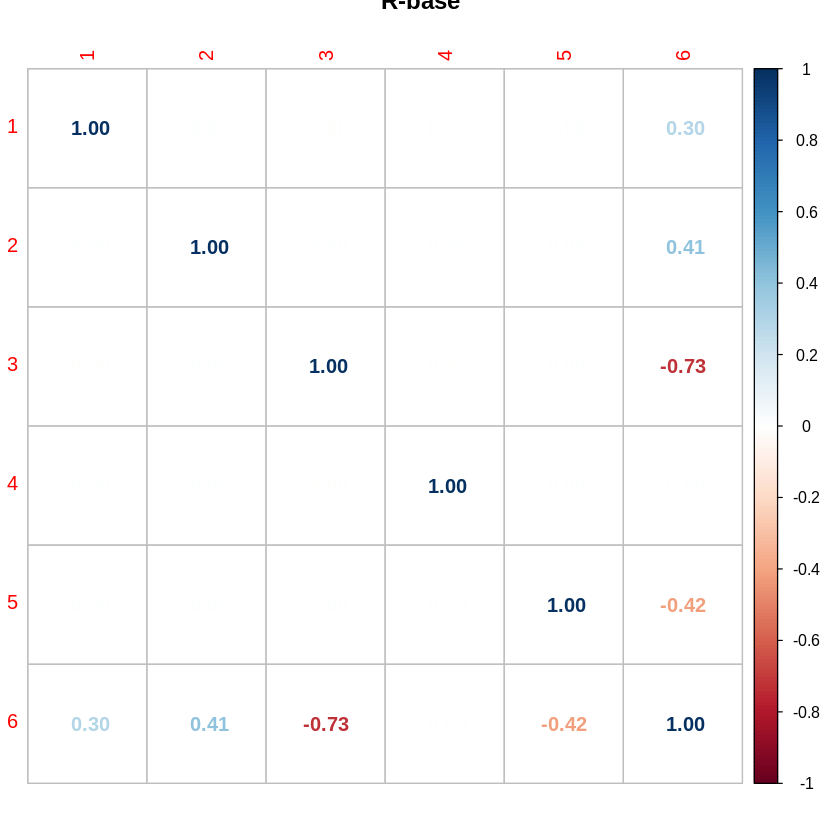

1.0000,0.0000,0.0000,0.000,0.0000,0.3293
0.0000,1.0000,0.0000,0.000,0.0000,0.6731
0.0000,0.0000,1.0000,0.000,0.0000,-0.3581
0.0000,0.0000,0.0000,1.000,0.0000,-0.5060
0.0000,0.0000,0.0000,0.000,1.0000,0.1815
0.3293,0.6731,-0.3581,-0.506,0.1815,1.0000


,Mean
,<dbl>
V1:,5.8433333333
V2:,3.0573333333
V3:,7.1006666667
V4:,3.7580000000
V5:,17.2180666667
V6:,1.1993333333
V7:,2.0000000000
,Variance
,<dbl>


2.2279283875,-0.89202483787,-1.285340149130,-0.1328533425531,0.101457712960,0.00000000000000076480722523
1.3010050255,0.69716098415,-0.678551622553,-0.0472236856384,0.013674478149,0.00000000000000122734433616
-2.8008661803,-0.52025785858,0.183603560775,-0.0201894911987,0.037428139313,-0.00000000000000098741617276
-2.5899592343,0.63858734098,0.307165568158,-0.0075162546568,0.122299719789,-0.00000000000000021452213293
-2.9842241484,0.28480025933,-0.050158159403,-0.0919430221472,0.107986320277,0.00000000000000020459378592
-2.9300222104,0.53640304021,-0.132316647274,-0.1749141204657,0.054342386276,0.00000000000000046779409876


       V1                    V2                      V3               
 Min.   :-3.50917169   Min.   :-2.7101587825   Min.   :-1.2853401491  
 1st Qu.:-2.62874836   1st Qu.:-0.5604921578   1st Qu.:-0.2579432234  
 Median : 0.40025203   Median : 0.0029412618   Median :-0.0020326045  
 Mean   : 0.00000000   Mean   : 0.0000000000   Mean   : 0.0000000000  
 3rd Qu.: 1.68851613   3rd Qu.: 0.5942115491   3rd Qu.: 0.3044018372  
 Max.   : 4.69929558   Max.   : 2.6577468531   Max.   : 0.9373629528  
       V4                     V5               
 Min.   :-0.696035418   Min.   :-0.1808180099  
 1st Qu.:-0.132310361   1st Qu.:-0.0751295558  
 Median : 0.016332758   Median : 0.0009539872  
 Mean   : 0.000000000   Mean   : 0.0000000000  
 3rd Qu.: 0.143139380   3rd Qu.: 0.0696732029  
 Max.   : 0.647080519   Max.   : 0.3448867167  
       V6                            
 Min.   :-0.00000000000000282337366  
 1st Qu.:-0.00000000000000086278662  
 Median :-0.00000000000000010051511  
 Mean   :-0.000

4.8107,0.000,0.0000,0.0000,0.0000,0
0.0000,0.924,0.0000,0.0000,0.0000,0
0.0000,0.000,0.2157,0.0000,0.0000,0
0.0000,0.000,0.0000,0.0404,0.0000,0
0.0000,0.000,0.0000,0.0000,0.0092,0
0.0000,0.000,0.0000,0.0000,0.0000,0


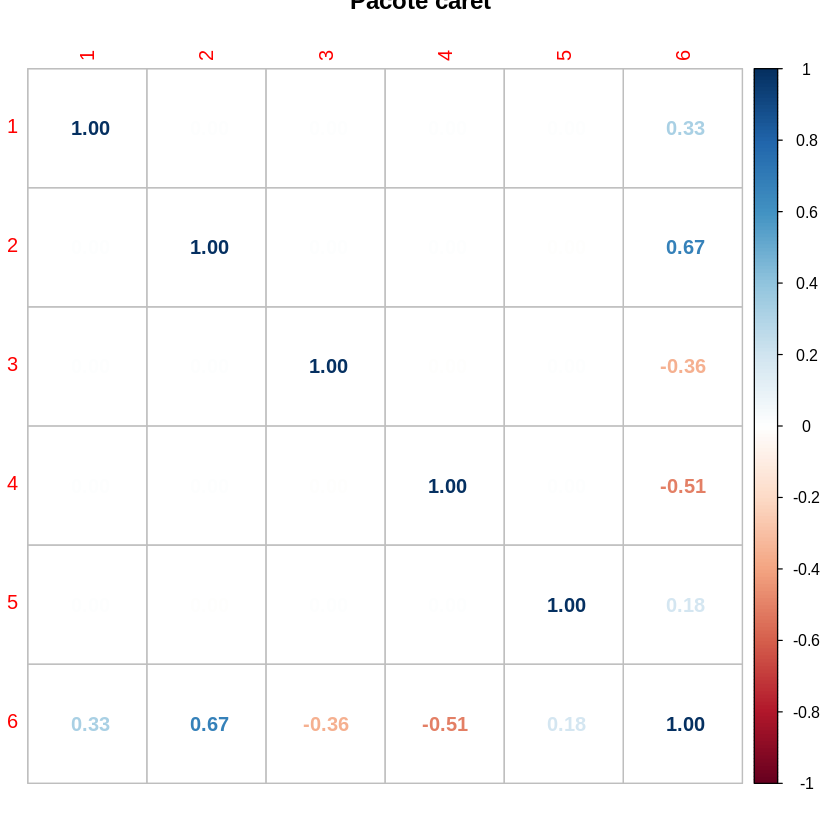

1.0000,0.0000,0.0000,0.000,0.0000,0.3293
0.0000,1.0000,0.0000,0.000,0.0000,0.6731
0.0000,0.0000,1.0000,0.000,0.0000,-0.3581
0.0000,0.0000,0.0000,1.000,0.0000,-0.5060
0.0000,0.0000,0.0000,0.000,1.0000,0.1815
0.3293,0.6731,-0.3581,-0.506,0.1815,1.0000


,Mean
,<dbl>
V1:,5.8433333333
V2:,3.0573333333
V3:,7.1006666667
V4:,3.7580000000
V5:,17.2180666667
V6:,1.1993333333
V7:,2.0000000000
,Variance
,<dbl>


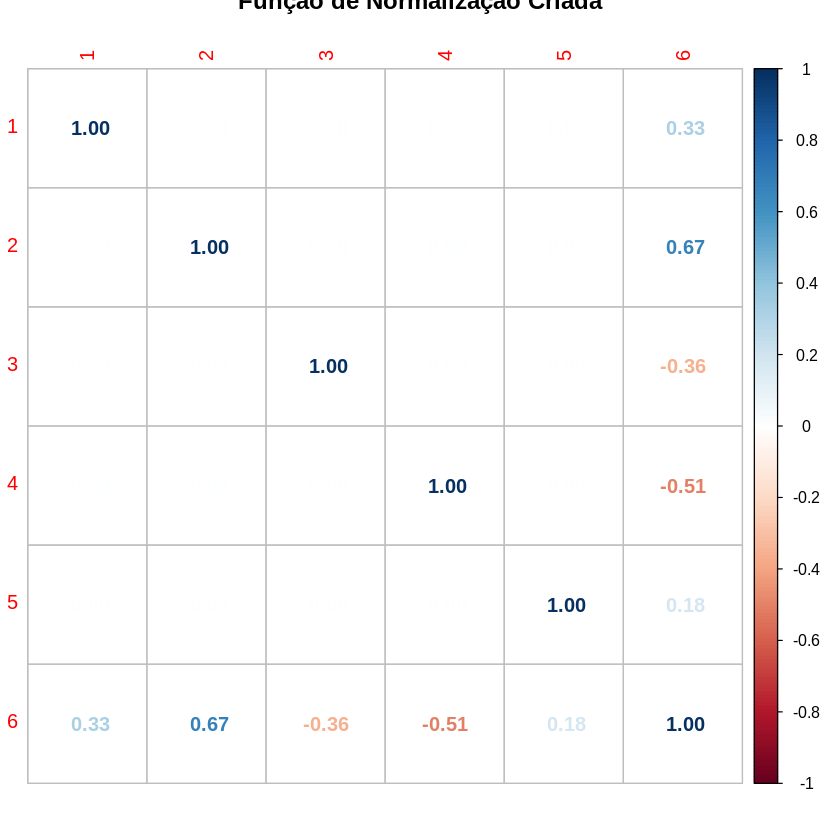

In [ ]:
# 2.c) Correlacao das variaveis ----
# Usando o R-base
correl1b <- norm1b%*%autb$vectors
correl1b %>% round(4) %>% head()
summary(correl1b)
cov(correl1b) %>% round(4)
corrplot(cor(correl1b), method = "number", title = "R-base")
cor(correl1b) %>% round(4)
estatisticas(correl1b)

# Usando o pacote caret
correl1c <- norm1c%*%autc$vectors
head(correl1c)
summary(correl1c)
cov(correl1c) %>% round(4)
corrplot(cor(correl1c), method = "number", title = "Pacote caret")
cor(correl1c) %>% round(4)
estatisticas(correl1c)

# Usando a funcao de normalizacao criada
correl1f <- norm1f%*%autf$vectors
head(correl1f)
summary(correl1f)
cov(correl1f) %>% round(4)
corrplot(cor(correl1f), method = "number", title = "Função de Normalização Criada")
cor(correl1f) %>% round(4)
estatisticas(correl1f)


#**2.d) Grau de informação/variância dos dados**

É utilizado o grau de informação/variância das variáveis para avaliar quais atributos melhor representam os dados, isso é feito para obter a redução dos dados e melhorar a visualização da matriz.

V1,V2
<dbl>,<dbl>
0.801785,0.801785
0.154008,0.955793
0.035943,0.991736
0.006734,0.998470
0.001530,1.000000
0.000000,1.000000


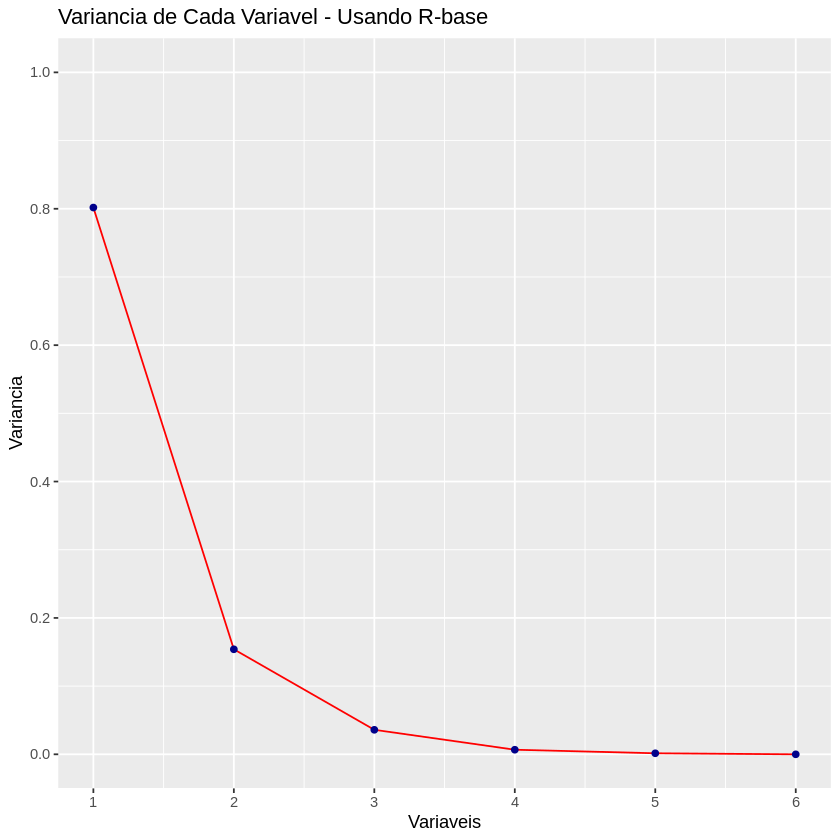

V1,V2
<dbl>,<dbl>
0.801785,0.801785
0.154008,0.955793
0.035943,0.991736
0.006734,0.998470
0.001530,1.000000
0.000000,1.000000


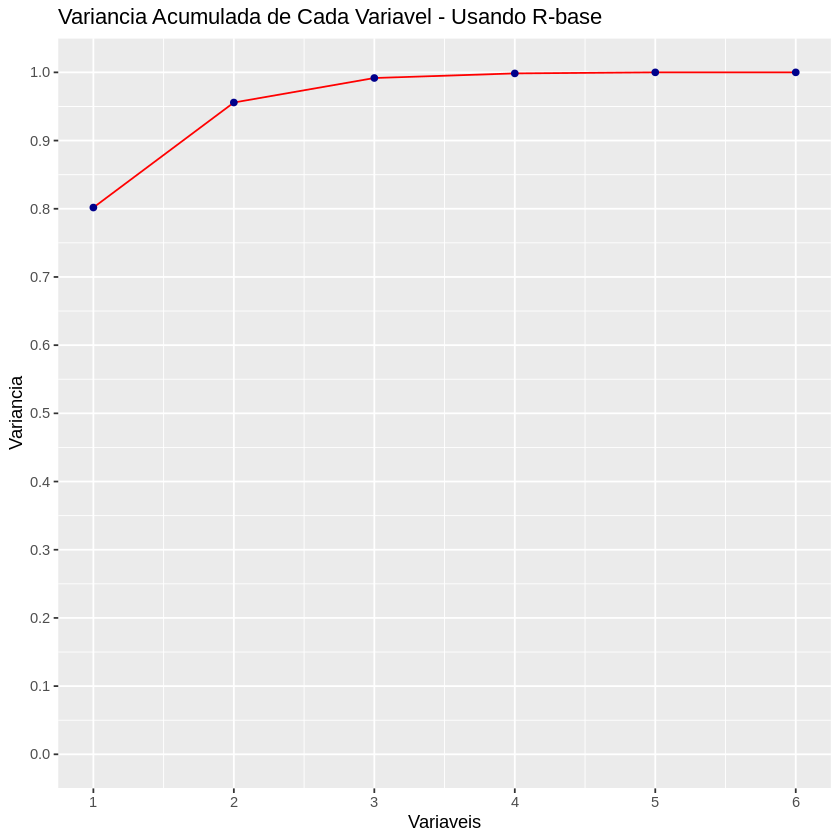

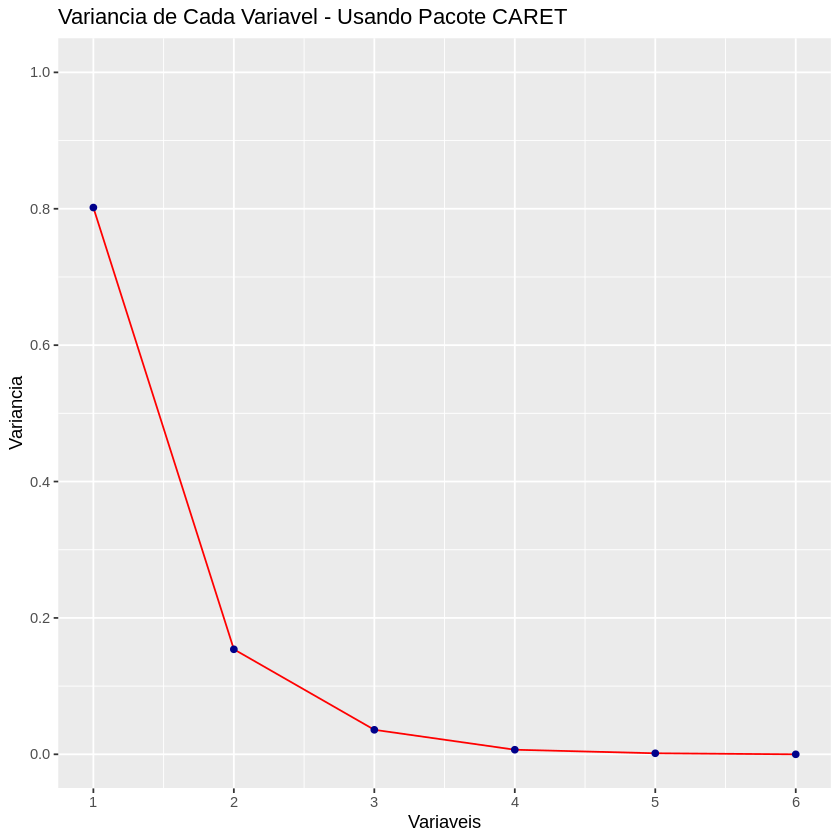

V1,V2
<dbl>,<dbl>
0.801785,0.801785
0.154008,0.955793
0.035943,0.991736
0.006734,0.998470
0.001530,1.000000
0.000000,1.000000


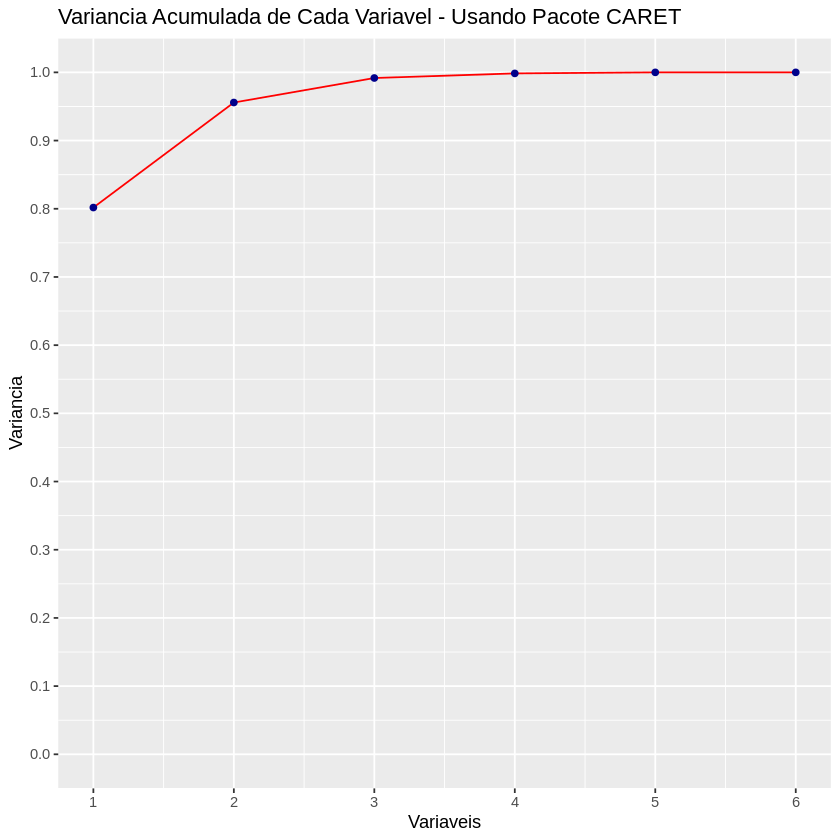

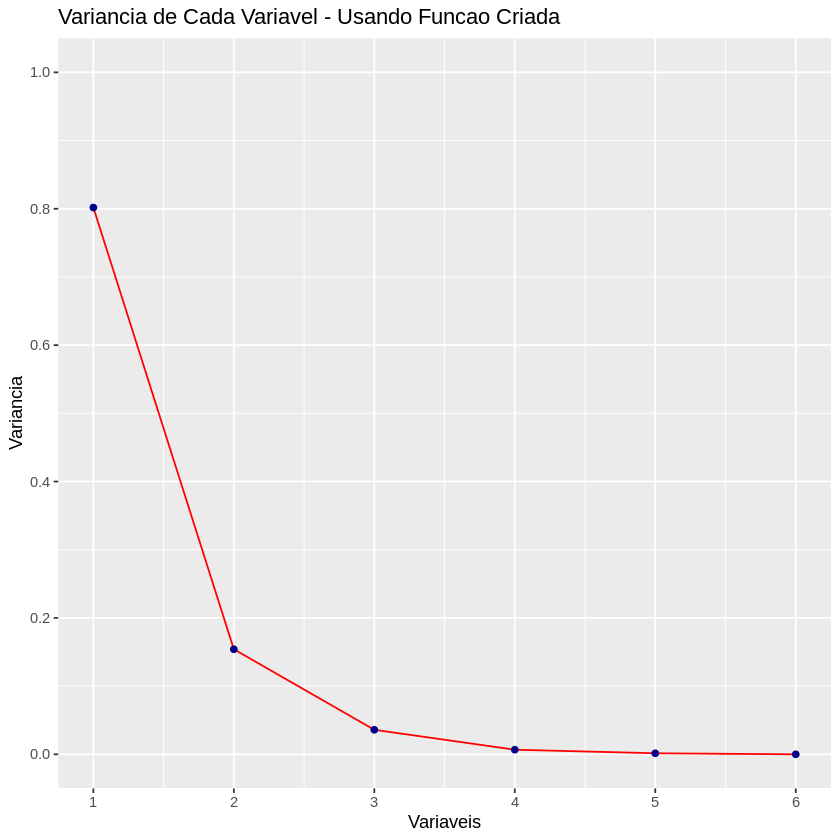

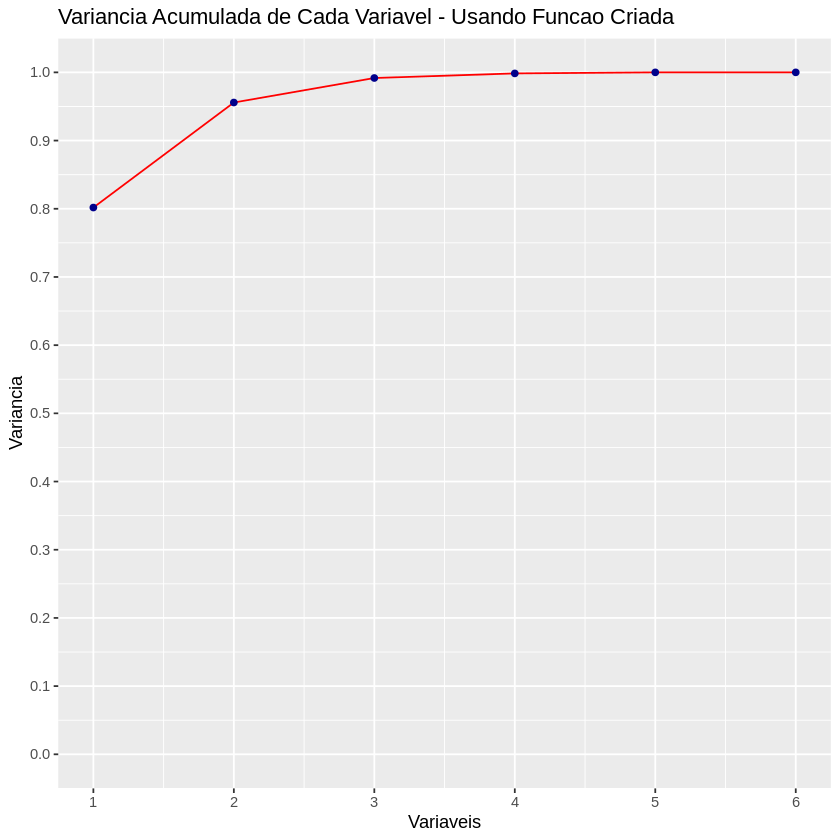

In [ ]:
perc <- function(x){
    # Função para medir o grau de informação (variância) dos dados
  perc <- list(); i = 1
  while(i<=length(x$values)){
    perc[[i]] <- x$values[i]/sum(x$values)
    i = i+1
    }
  perc <- do.call(rbind,perc) %>% as.data.frame()
  perc[,2] <- cumsum(perc[,1])
  return(perc %>% round(6))
}

perc(autb) # Usando o R-base
# R-base
ggplot(perc(autb), aes(y=V1,x=1:length(V1))) +
  geom_line(colour = "red") +
  geom_point(colour = "darkblue") +
  scale_x_continuous(name = "Variaveis", breaks = seq(1,length(perc(autb)$V1),1)) + 
  scale_y_continuous(name = "Variancia", breaks = seq(0,1,0.2), limits = 0:1) +
  labs(title = "Variancia de Cada Variavel - Usando R-base")

ggplot(perc(autb), aes(y=V2,x=1:length(V2))) +
  geom_line(colour = "red") +
  geom_point(colour = "darkblue") +
  scale_x_continuous(name = "Variaveis", breaks = seq(1,length(perc(autb)$V2),1)) + 
  scale_y_continuous(name = "Variancia", breaks = seq(0,1,0.1), limits = 0:1) + 
  labs(title = "Variancia Acumulada de Cada Variavel - Usando R-base")

perc(autc) # Usando o pacote caret
# Pacote Caret
ggplot(perc(autc), aes(y=V1,x=1:length(V1))) +
  geom_line(colour = "red") +
  geom_point(colour = "darkblue") +
  scale_x_continuous(name = "Variaveis", breaks = seq(1,length(perc(autc)$V1),1)) + 
  scale_y_continuous(name = "Variancia", breaks = seq(0,1,0.2), limits = 0:1) +
  labs(title = "Variancia de Cada Variavel - Usando Pacote CARET")

ggplot(perc(autc), aes(y=V2,x=1:length(V2))) +
  geom_line(colour = "red") +
  geom_point(colour = "darkblue") +
  scale_x_continuous(name = "Variaveis", breaks = seq(1,length(perc(autc)$V2),1)) + 
  scale_y_continuous(name = "Variancia", breaks = seq(0,1,0.1), limits = 0:1) + 
  labs(title = "Variancia Acumulada de Cada Variavel - Usando Pacote CARET")

perc(autf) # Usando funcao de normalizacao criada
# Funcao de normalizacao criada
ggplot(perc(autf), aes(y=V1,x=1:length(V1))) +
  geom_line(colour = "red") +
  geom_point(colour = "darkblue") +
  scale_x_continuous(name = "Variaveis", breaks = seq(1,length(perc(autf)$V1),1)) + 
  scale_y_continuous(name = "Variancia", breaks = seq(0,1,0.2), limits = 0:1) +
  labs(title = "Variancia de Cada Variavel - Usando Funcao Criada")

ggplot(perc(autf), aes(y=V2,x=1:length(V2))) +
  geom_line(colour = "red") +
  geom_point(colour = "darkblue") +
  scale_x_continuous(name = "Variaveis", breaks = seq(1,length(perc(autf)$V2),1)) + 
  scale_y_continuous(name = "Variancia", breaks = seq(0,1,0.1), limits = 0:1) + 
  labs(title = "Variancia Acumulada de Cada Variavel - Usando Funcao Criada")

# É possível notar que as variáveis V1 e V2 possuem mais de 95% de explicação dos dados,
# onde que, se acrescentar a variável V3, a representação chega a 99%. Sendo então preferível
# que utilizemos as duas primeiras, todavia que ambas tem melhor explicação dos dados.

#Análise
A maior parte da informação estão nas duas primeiras variáveis, onde juntas somam mais de 95% da variância dos dados. Dessa forma, é preferível a visualização de PC1 e PC2.

#**2.f) Análise de Componentes Principais (PCA)**

[1] "Usando funcao prcomp do R-base"


Importance of components:
                             PC1        PC2        PC3        PC4         PC5
Standard deviation     2.1933331 0.96127505 0.46438785 0.20100379 0.095820488
Proportion of Variance 0.8017900 0.15401000 0.03594000 0.00673000 0.001530000
Cumulative Proportion  0.8017900 0.95579000 0.99174000 0.99847000 1.000000000
                                            PC6
Standard deviation     0.0000000000000002833077
Proportion of Variance 0.0000000000000000000000
Cumulative Proportion  1.0000000000000000000000

[1] "Auto valores"


PC1 
4.81071011078423538265269598923623561859131 
                                        PC2 
0.92404972231578363928150565698160789906979 
                                        PC3 
0.21565607770424932709829590748995542526245 
                                        PC4 
0.04040252319713558137870279551862040534616 
                                        PC5 
0.00918156599859612336522740605460057849996 
                                        PC6 
0.00000000000000000000000000000015371702762

[1] "Matriz de Auto Vetores"


,PC1,PC2,PC3,PC4,PC5,PC6
V1,-0.41643134729,-0.3416284009631,-0.51249580847,0.176657022204,0.011496633313,-0.644890020763264071312903525
V2,0.19852946652,-0.9342621045351,0.13229843082,-0.020957717594,-0.070597748763,0.254586386321505320218250290
V3,-0.44280260984,0.0243366919211,-0.50537245543,0.165494734178,0.035229467509,0.720626555866292095586800315
V4,-0.45080304193,0.0065688781545,0.24579621155,-0.284203439701,-0.809658010813,-0.000000000000000013877787808
V5,-0.44720045527,-0.0921351986207,0.20562162554,-0.671386235920,0.546336093728,0.000000000000000346944695195
V6,-0.43345726759,-0.0363323014173,0.60145475499,0.639869901322,0.199031274247,0.000000000000000013877787808


[1] "Matriz multiplicada pelos auto vetores (descorrelacionado)"


,PC1,PC2,PC3,PC4,PC5,PC6
2,-2.2279283875,-0.89202483787,1.285340149130,-0.1328533425531,0.101457712960,0.000000000000000605338157660
3,-1.3010050255,0.69716098415,0.678551622553,-0.0472236856384,0.013674478149,0.000000000000000431027489078
4,2.8008661803,-0.52025785858,-0.183603560775,-0.0201894911987,0.037428139313,-0.000000000000000268235387767
5,2.5899592343,0.63858734098,-0.307165568158,-0.0075162546568,0.122299719789,0.000000000000000134139111560
6,2.9842241484,0.28480025933,0.050158159403,-0.0919430221472,0.107986320277,-0.000000000000000210253062428
7,2.9300222104,0.53640304021,0.132316647274,-0.1749141204657,0.054342386276,-0.000000000000000047280866219


[1] "Desvio-padrao de cada variavel da matriz descorrelacionada"


[1] 2.19333310529528091592510464 0.96127505029298621064270947
[3] 0.46438785266655008276970307 0.20100378901188792335474886
[5] 0.09582048840720923388314390 0.00000000000000028330769505

,PC1,PC2,PC3,PC4,PC5,PC6,Classes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,-2.2279283875,-0.89202483787,1.285340149130,-0.1328533425531,0.101457712960,0.000000000000000605338157660,3
3,-1.3010050255,0.69716098415,0.678551622553,-0.0472236856384,0.013674478149,0.000000000000000431027489078,3
4,2.8008661803,-0.52025785858,-0.183603560775,-0.0201894911987,0.037428139313,-0.000000000000000268235387767,1
5,2.5899592343,0.63858734098,-0.307165568158,-0.0075162546568,0.122299719789,0.000000000000000134139111560,1
6,2.9842241484,0.28480025933,0.050158159403,-0.0919430221472,0.107986320277,-0.000000000000000210253062428,1
7,2.9300222104,0.53640304021,0.132316647274,-0.1749141204657,0.054342386276,-0.000000000000000047280866219,1


[1] "Usando pacote caret"
[1] "Matriz descorrelacionada"


,PC1,PC2,PC3,PC4,PC5,PC6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,-2.2279283875,-0.89202483787,1.285340149130,-0.1328533425531,0.101457712960,0.000000000000000787154573514
3,-1.3010050255,0.69716098415,0.678551622553,-0.0472236856384,0.013674478149,0.000000000000000224606363484
4,2.8008661803,-0.52025785858,-0.183603560775,-0.0201894911987,0.037428139313,-0.000000000000000102627527952
5,2.5899592343,0.63858734098,-0.307165568158,-0.0075162546568,0.122299719789,-0.000000000000000092328487565
6,2.9842241484,0.28480025933,0.050158159403,-0.0919430221472,0.107986320277,-0.000000000000000444048616316
7,2.9300222104,0.53640304021,0.132316647274,-0.1749141204657,0.054342386276,-0.000000000000000402551167120


[1] "Matriz de auto vetores"


,PC1,PC2,PC3,PC4,PC5,PC6
V1,-0.41643134729,-0.3416284009631,-0.51249580847,0.176657022204,0.011496633313,-0.644890020763263960290601062
V2,0.19852946652,-0.9342621045351,0.13229843082,-0.020957717594,-0.070597748763,0.254586386321505597774006446
V3,-0.44280260984,0.0243366919211,-0.50537245543,0.165494734178,0.035229467509,0.720626555866292206609102777
V4,-0.45080304193,0.0065688781545,0.24579621155,-0.284203439701,-0.809658010813,-0.000000000000000041633363423
V5,-0.44720045527,-0.0921351986207,0.20562162554,-0.671386235920,0.546336093728,0.000000000000000249800180541
V6,-0.43345726759,-0.0363323014173,0.60145475499,0.639869901322,0.199031274247,0.000000000000000076327832943


[1] "Auto valores"


PC1 
4.81071011078423715900953538948670029640198 
                                        PC2 
0.92404972231578319519229580691899172961712 
                                        PC3 
0.21565607770424927158714467623212840408087 
                                        PC4 
0.04040252319713559525649060333307716064155 
                                        PC5 
0.00918156599859612163050393007779348408803 
                                        PC6 
0.00000000000000000000000000000013915420573

,PC1,PC2,PC3,PC4,PC5,PC6,Classes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,-2.2279283875,-0.89202483787,1.285340149130,-0.1328533425531,0.101457712960,0.000000000000000787154573514,3
3,-1.3010050255,0.69716098415,0.678551622553,-0.0472236856384,0.013674478149,0.000000000000000224606363484,3
4,2.8008661803,-0.52025785858,-0.183603560775,-0.0201894911987,0.037428139313,-0.000000000000000102627527952,1
5,2.5899592343,0.63858734098,-0.307165568158,-0.0075162546568,0.122299719789,-0.000000000000000092328487565,1
6,2.9842241484,0.28480025933,0.050158159403,-0.0919430221472,0.107986320277,-0.000000000000000444048616316,1
7,2.9300222104,0.53640304021,0.132316647274,-0.1749141204657,0.054342386276,-0.000000000000000402551167120,1


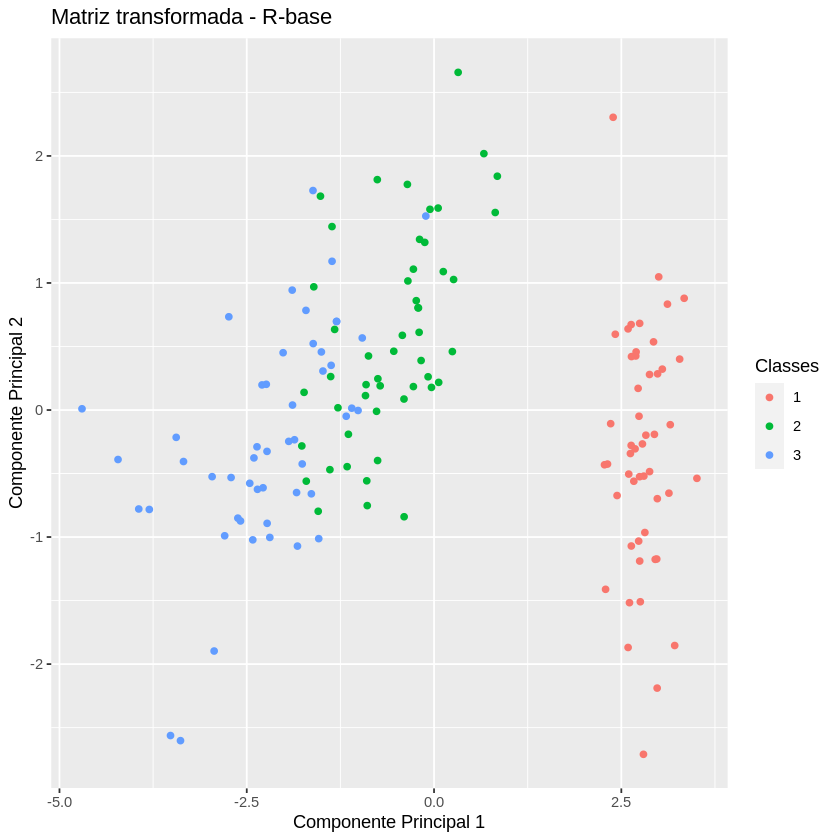

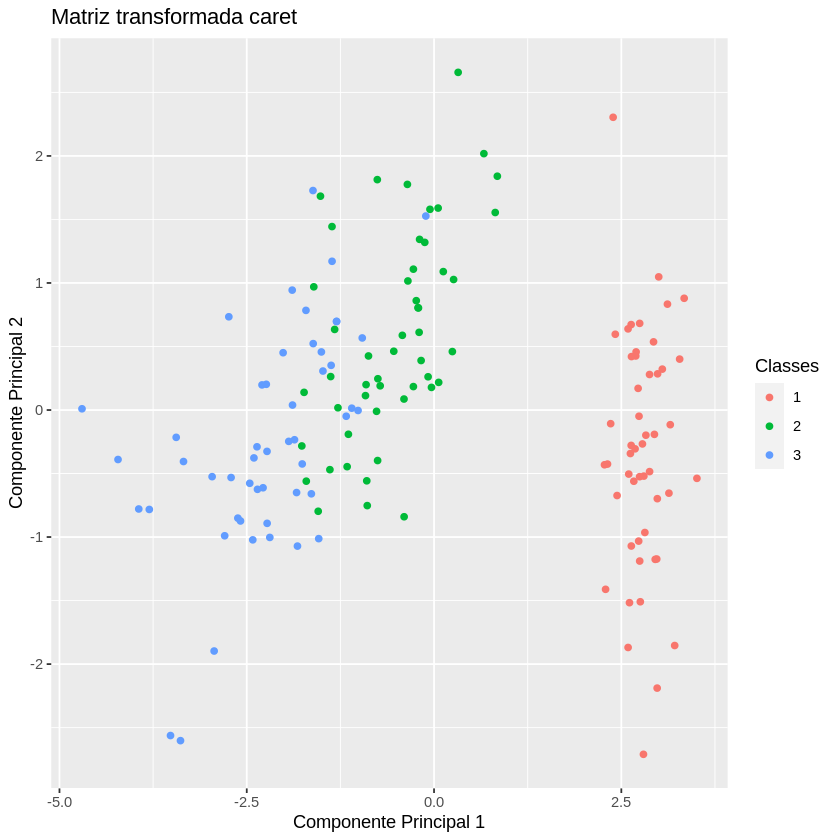

In [ ]:
print("Usando funcao prcomp do R-base")
c1.pcab <- prcomp(c1[,1:6], center = T, scale = T)
summary(c1.pcab)

print("Auto valores")
cov(c1.pcab$x) %>% diag() 
print("Matriz de Auto Vetores")
c1.pcab$rotation 
print("Matriz multiplicada pelos auto vetores (descorrelacionado)")
c1.pcab$x %>% head()
print("Desvio-padrao de cada variavel da matriz descorrelacionada")
c1.pcab$sdev 

c1.transb <- data.frame(c1.pcab$x, Classes=c1$Classes)
head(c1.transb)

ggplot(c1.transb, aes(x=PC1, y=PC2)) +
  geom_point(aes(colour=factor(Classes))) +
  labs(x="Componente Principal 1", y="Componente Principal 2", 
       colour="Classes", title = "Matriz transformada - R-base")

print("Usando pacote caret")
c1.pcac <- preProcess(c1[,1:6], method = c("pca", "center", "scale"), pcaComp = 6)

print("Matriz descorrelacionada")
c1.pcacPred <- c1.pcac %>% predict(c1[,1:6]) # 
c1.pcacPred %>% head()
print("Matriz de auto vetores")
c1.pcac$rotation 
print("Auto valores")
cov(c1.pcacPred) %>% diag() 

c1.transc <- data.frame(c1.pcacPred, Classes=c1$Classes)
head(c1.transc)

ggplot(c1.transc, aes(x=PC1, y=PC2)) +
  geom_point(aes(colour=factor(Classes))) +
  labs(x="Componente Principal 1", y="Componente Principal 2", 
       colour="Classes", title = "Matriz transformada caret")

# Análise


#**3.a) Matriz de Covariância após a Normalização**

In [ ]:
print("Normalizacao R-base")
cov(correl1b) %>% round(4) 
print("Normalizacao caret")
cov(correl1c) %>% round(4) 
print("Normalizacao Funcao criada")
cov(correl1f) %>% round(4) 


[1] "Normalizacao R-base"


4.8107,0.000,0.0000,0.0000,0.0000,0
0.0000,0.924,0.0000,0.0000,0.0000,0
0.0000,0.000,0.2157,0.0000,0.0000,0
0.0000,0.000,0.0000,0.0404,0.0000,0
0.0000,0.000,0.0000,0.0000,0.0092,0
0.0000,0.000,0.0000,0.0000,0.0000,0


[1] "Normalizacao caret"


4.8107,0.000,0.0000,0.0000,0.0000,0
0.0000,0.924,0.0000,0.0000,0.0000,0
0.0000,0.000,0.2157,0.0000,0.0000,0
0.0000,0.000,0.0000,0.0404,0.0000,0
0.0000,0.000,0.0000,0.0000,0.0092,0
0.0000,0.000,0.0000,0.0000,0.0000,0


[1] "Normalizacao Funcao criada"


4.8107,0.000,0.0000,0.0000,0.0000,0
0.0000,0.924,0.0000,0.0000,0.0000,0
0.0000,0.000,0.2157,0.0000,0.0000,0
0.0000,0.000,0.0000,0.0404,0.0000,0
0.0000,0.000,0.0000,0.0000,0.0092,0
0.0000,0.000,0.0000,0.0000,0.0000,0


#**3.b) Redução dos Dados**

Conforme observado na questão 2.d) as duas primeiras variáveis tem melhor poder explicativo dos dados, então iremos visualizar como é a relação/dispersão entre V1 e V2.

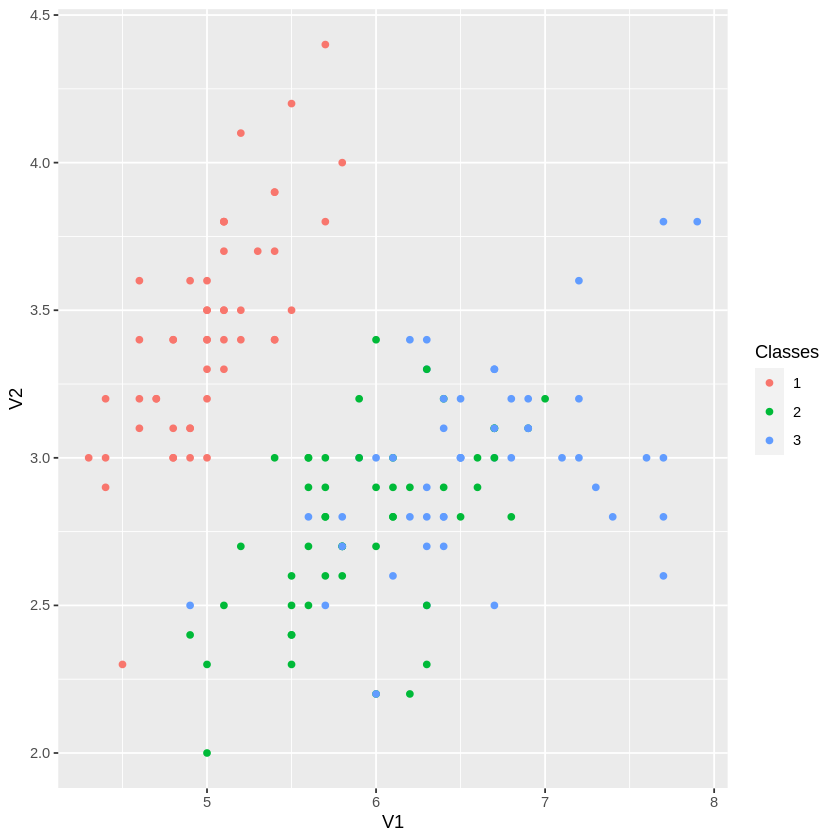

In [ ]:
ggplot(c1, aes(x=V1, y=V2)) +
  geom_point(aes(colour=factor(Classes))) +
  labs(x="V1", y="V2", colour="Classes")

# Análise


#**3.c) Redução dos dados descorrelacionados**

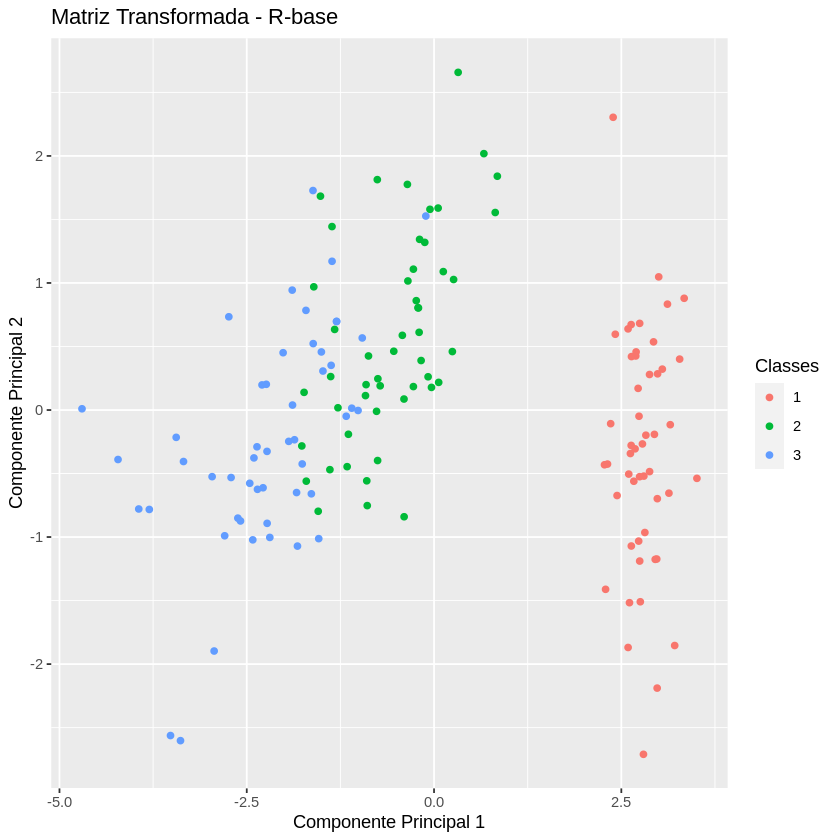

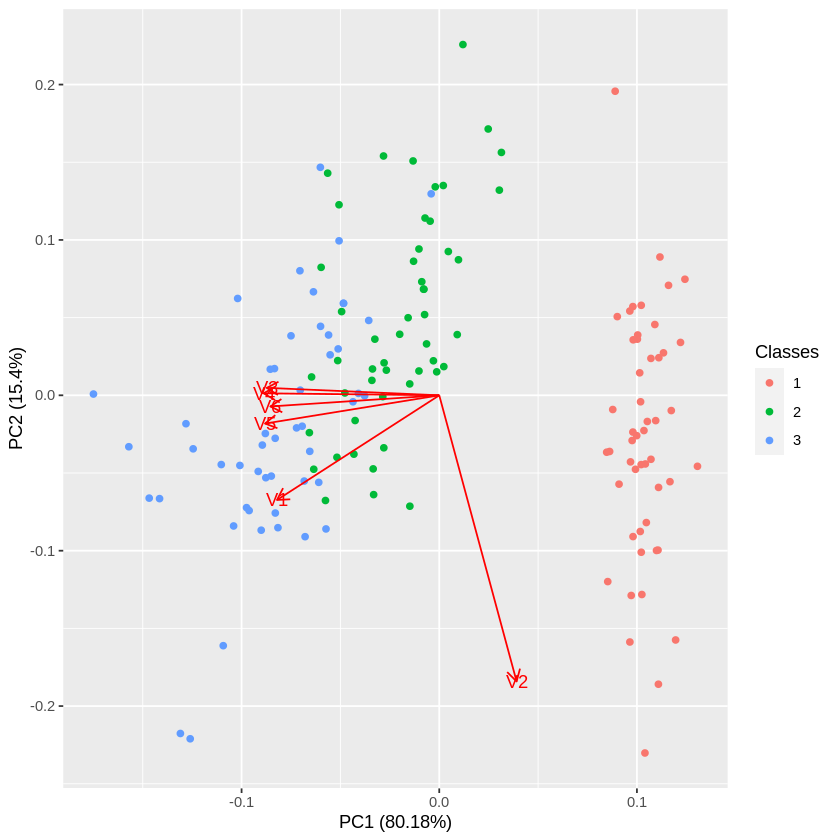

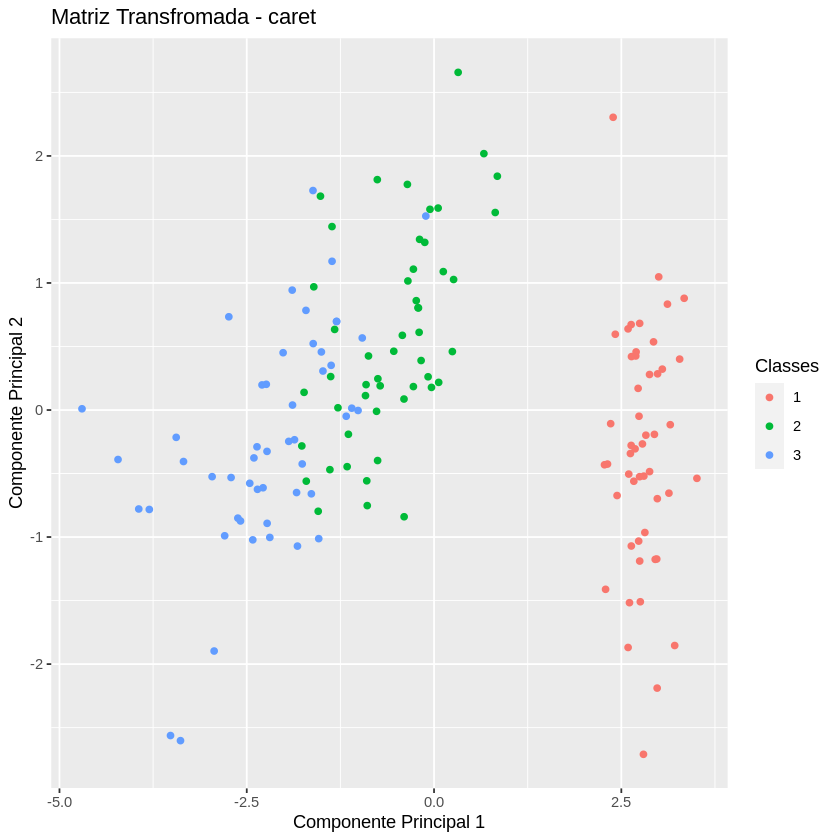

In [ ]:
c1$Classes <- factor(c1$Classes)
# Usando o R-base
ggplot(c1.transb, aes(x=PC1, y=PC2)) +
  geom_point(aes(colour=factor(Classes))) +
  labs(x="Componente Principal 1", y="Componente Principal 2", 
       colour="Classes", title = "Matriz Transformada - R-base")
autoplot(c1.pcab, data = c1, colour = "Classes", label = F, loadings = T, loadings.label = T)

# Usando o caret
ggplot(c1.transc, aes(x=PC1, y=PC2)) +
  geom_point(aes(colour=factor(c1$Classes))) +
  labs(x="Componente Principal 1", y="Componente Principal 2", 
       colour="Classes", title = "Matriz Transfromada - caret")

# Análise

#**3.d) Comparação Visual entre V1 e V2 dos dados brutos e descorrelacionados**

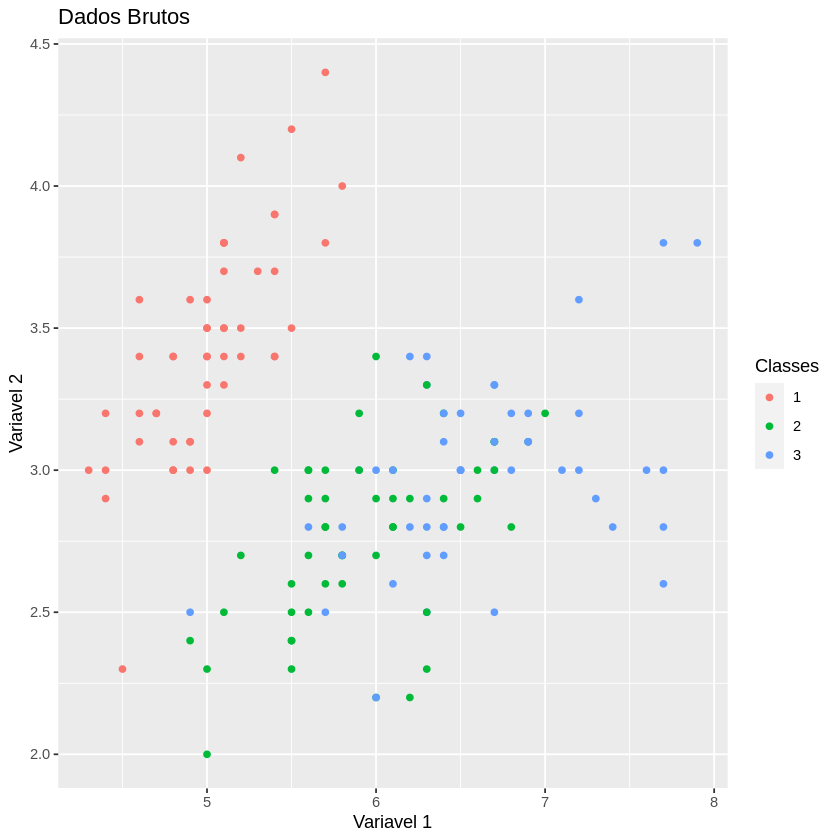

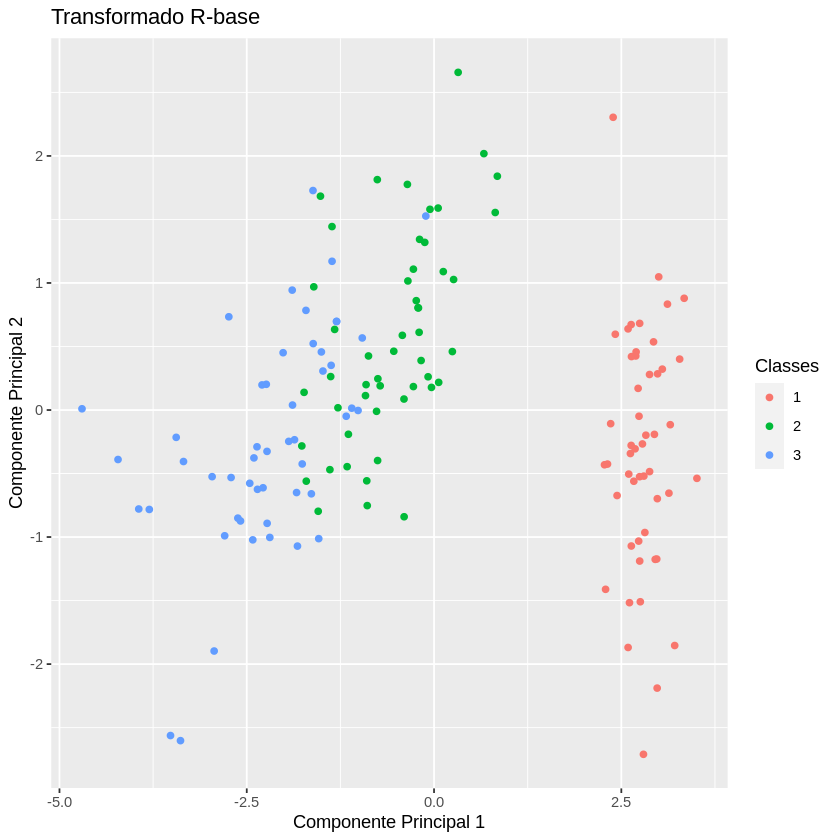

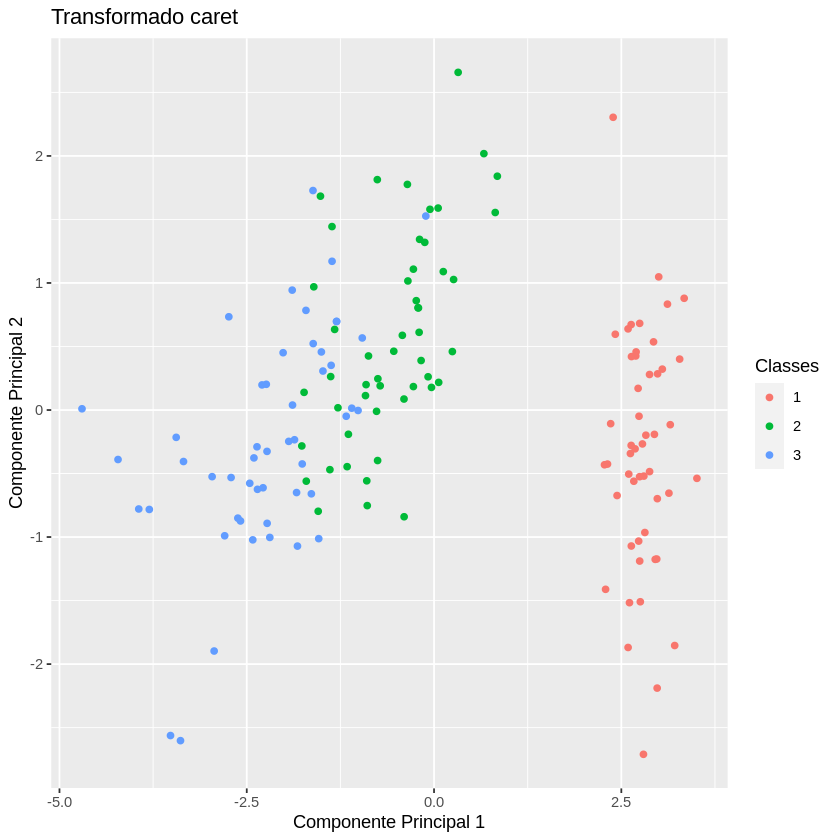

In [ ]:
# Dados Brutos
ggplot(c1, aes(x=V1, y=V2)) +
  geom_point(aes(colour=factor(Classes))) +
  labs(x="Variavel 1", y="Variavel 2", 
       colour="Classes", title = "Dados Brutos")

# Dados normalizados pelo R-base
ggplot(c1.transb, aes(x=PC1, y=PC2)) +
  geom_point(aes(colour=factor(Classes))) +
  labs(x="Componente Principal 1", y="Componente Principal 2", 
       colour="Classes", title = "Transformado R-base")

# Dados normalizados pelo pacote caret
ggplot(c1.transc, aes(x=PC1, y=PC2)) +
  geom_point(aes(colour=factor(c1$Classes))) +
  labs(x="Componente Principal 1", y="Componente Principal 2", 
       colour="Classes", title = "Transformado caret")

# Análise

#***LISTA 1 - T2***

***Questão 1) Primeira aba***

In [ ]:
file <- "https://github.com/nadsu077/Top.in.CompXIII/blob/main/Lista1_Conjunto2.xlsx"
tmp <- tempfile(pattern = ".xlsx")
download.file(file, quiet = T, destfile = tmp)
c2 <- read_xlsx(tmp, sheet = 1) %>% as.data.frame()
c2 <- c2[!is.na(c2[,3]),-2]

ERROR: ignored

**Análise rápida das respostas**

In [ ]:
par(mfrow=c(1,3))
plot(c2[,1], c2[,2], type = "p", main = "Concentração das Respostas")
boxplot(c2[c2[,1]==1,2], main = "Boxplot do Target = 1")
boxplot(c2[c2[,1]==0,2], main = "Boxplot do Target = 0")
par(mfrow=c(1,1))

**Limiar das respostas**

In [ ]:
ggplot() +
  geom_line(data = aux, aes(x = aux[,3], y = aux[order(aux[,1], decreasing = T),1]), color = "blue") +
  geom_line(data = aux, aes(x = aux[,3], y = aux[order(aux[,2]),2]), color = "red") +
  geom_hline(yintercept = 0.534, linetype = "dashed") +
  ylab("Resposta do Modelo") +
  xlab("") +
  annotate("text",x = 160, y = 0.5, label = "Limiar aproximadamente\nde 0.534", size = 5) +
  scale_x_continuous(limits = c(0,nrow(aux)), breaks = seq(0,nrow(aux), by = 20), expand = c(0,0)) +
  scale_y_continuous(limits = c(0,1), breaks = seq(0,1, by = 0.05), expand = c(0,0)) +
  theme_linedraw()

**Estabelecendo o valor de 0.534 para o primeiro limiar de Respostas x Target**

In [ ]:
# Matriz auxiliar
aux1 <- matrix(NA, nrow = nrow(c2), ncol = 2) %>% as.data.frame()
aux1[,1] <- c2$Target
aux1[,2] <- c2$Resposta
names(aux1) <- c("Target", "Resposta")

# Definindo quem for maior ou igual a 0.534 = 1 e 0 c.c.
aux1[aux1[,2]>=0.534,2] <- 1 ; aux1[aux1[,2]<0.534,2] <- 0

# Matriz de confusão
cm <- table(aux1$Target, aux1$Resposta)
cm

**Métricas do primeiro limiar**

In [ ]:
# Acurácia
acc <- sum(diag(cm)) / sum(cm)

# Taxa de FP
tfp <- round(cm[3] / sum(cm[,2]),2)

# Taxa de FN
tfn <- round(cm[2]/sum(cm[,1]),2)

# Tabelando as Métricas
metricas <- rbind(ACC = acc, TFP = tfp, TFN = tfn) %>% as.data.frame()
names(metricas) = "Resultado"
metricas

**Estabelecendo o valor de 0.5 para o segundo limiar de Respostas x Target**

In [ ]:
# Matrix auxiliar
aux2 <- matrix(NA, nrow = nrow(c2), ncol = 2) %>% as.data.frame()
aux2[,1] <- c2$Target
aux2[,2] <- c2$Resposta
names(aux2) <- c("Target", "Resposta")

# Definindo quem for maior ou igual a 0.5 = 1 e 0 c.c.
aux2[aux2[,2]>=0.5,2] <- 1 ; aux2[aux2[,2]<0.5,2] <- 0

# Matriz de confusão
cm1 <- table(aux2$Target, aux2$Resposta)
cm1

**Métricas do segundo limiar**

In [ ]:
# Acurácia
acc <- sum(diag(cm1)) / sum(cm1)

# Taxa de FP
tfp <- round(cm1[3] / sum(cm1[,2]),2)

# Taxa de FN
tfn <- round(cm1[2]/sum(cm1[,1]),2)

# Tabelando as Métricas
metricas1 <- rbind(ACC = acc, TFP = tfp, TFN = tfn) %>% as.data.frame()
names(metricas1) = "Resultado"
metricas1

***Questão 2) Segunda aba***